# Blinkit Sales: Exploratory Data Analysis Documentation

This project explores and visualizes key performance metrics from Blinkit, a grocery delivery platform. My analysis spans multiple datasets including product listings, delivery performance, order patterns, and marketing metrics.

### Project Goals
- Understand pricing, stock levels, and product profitability
- Investigate patterns in delivery delays as well as customer spending and behavior
- Explore revenue drivers and popular items
- Evaluate the effectiveness of marketing channels and campaign performance across different segments and time periods
- Explore customer feedback

In [206]:
# importing neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Recalcualting ROAS:

In [207]:
import os

def recalculate_roas(csv_path, output_path=None):
    """
    Recalculates the ROAS column using revenue_generated / spend and overwrites the original column.
    Optionally saves to a new output path.
    """
    # Load CSV
    df = pd.read_csv(csv_path)

    # ensure necessary columns exist
    if 'revenue_generated' not in df.columns or 'spend' not in df.columns:
        raise ValueError('CSV must contain 'revenue_generated' and 'spend' columns.')

    # recalculate roas
    df['roas'] = (df['revenue_generated'] / df['spend']).round(2)

    # save file in-place or to a new location
    if output_path:
        df.to_csv(output_path, index=False)
        print(f'Cleaned file saved to: {output_path}')
    else:
        df.to_csv(csv_path, index=False)
        print(f'Original file updated in-place: {csv_path}')

# overwrite:
recalculate_roas('/Users/tovi/Desktop/Projects/Blinket-Sales/csv_files/blinkit_marketing_performance.csv')



Original file updated in-place: /Users/tovi/Desktop/Projects/Blinket-Sales/csv_files/blinkit_marketing_performance.csv


## **File 1: Blinkit Products**

This section analyzes Blinkit's product listings with a focus on pricing and profitability. Using product-level details such as price, maximum retail price (MRP), and margin percentage, I evaluated the distribution of product prices and identify patterns in profit margins across the catalog. This analysis reveals any high-margin products, pricing anomalies, and opportunities to improve revenue strategy through better product positioning and pricing structure.


In [208]:
# loading csv into a dataframe
product_df = pd.read_csv('/Users/tovi/Desktop/Projects/Blinket-Sales/csv_files/blinkit_products.csv')
product_df

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88
1,11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65
2,669378,Potatoes,Fruits & Vegetables,Chadha and Sons,212.14,282.85,25.0,3,23,70
3,848226,Tomatoes,Fruits & Vegetables,Barad and Sons,209.59,279.45,25.0,3,10,51
4,890623,Onions,Fruits & Vegetables,"Sangha, Nagar and Varty",354.52,472.69,25.0,3,27,55
...,...,...,...,...,...,...,...,...,...,...
263,444361,Pain Reliever,Pharmacy,"Prakash, Bawa and Kale",822.63,1028.29,20.0,365,20,71
264,679284,Cough Syrup,Pharmacy,Pant LLC,877.89,1097.36,20.0,365,28,95
265,240179,Cough Syrup,Pharmacy,Ram-Suri,90.56,113.20,20.0,365,20,56
266,673058,Cough Syrup,Pharmacy,Balan-Madan,765.76,957.20,20.0,365,30,94


In [209]:
#checking the shape of df
product_df.shape

(268, 10)

In [210]:
# general descriptive stats
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         268 non-null    int64  
 1   product_name       268 non-null    object 
 2   category           268 non-null    object 
 3   brand              268 non-null    object 
 4   price              268 non-null    float64
 5   mrp                268 non-null    float64
 6   margin_percentage  268 non-null    float64
 7   shelf_life_days    268 non-null    int64  
 8   min_stock_level    268 non-null    int64  
 9   max_stock_level    268 non-null    int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 21.1+ KB


In [211]:
# checking for duplicates
product_df.duplicated().sum()

0

In [212]:
# checking for null values
null_check = product_df.isnull().sum()
print(null_check)

product_id           0
product_name         0
category             0
brand                0
price                0
mrp                  0
margin_percentage    0
shelf_life_days      0
min_stock_level      0
max_stock_level      0
dtype: int64


In [213]:
# creating new column that converts prices from the Indian Rupee to the US Dollar
exchange_rate = 0.012
product_df['price_usd'] = product_df['price'] * exchange_rate
product_df.head()

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level,price_usd
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88,11.37540
1,11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65,1.52592
2,669378,Potatoes,Fruits & Vegetables,Chadha and Sons,212.14,282.85,25.0,3,23,70,2.54568
3,848226,Tomatoes,Fruits & Vegetables,Barad and Sons,209.59,279.45,25.0,3,10,51,2.51508
4,890623,Onions,Fruits & Vegetables,"Sangha, Nagar and Varty",354.52,472.69,25.0,3,27,55,4.25424


#### **Pricing & Margins**

In [214]:
# calculating average price and margin percentage
product_df[['price_usd', 'margin_percentage']].mean()

price_usd             5.860282
margin_percentage    27.779851
dtype: float64

In [215]:
# calcultaing margin percentage variation across categories
product_df.groupby('category')['margin_percentage'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Baby Care,16.0,30.0,0.0,30.0,30.0,30.0,30.0,30.0
Cold Drinks & Juices,22.0,30.0,0.0,30.0,30.0,30.0,30.0,30.0
Dairy & Breakfast,30.0,20.0,0.0,20.0,20.0,20.0,20.0,20.0
Fruits & Vegetables,27.0,25.0,0.0,25.0,25.0,25.0,25.0,25.0
Grocery & Staples,24.0,15.0,0.0,15.0,15.0,15.0,15.0,15.0
Household Care,27.0,25.0,0.0,25.0,25.0,25.0,25.0,25.0
Instant & Frozen Food,20.0,40.0,0.0,40.0,40.0,40.0,40.0,40.0
Personal Care,25.0,35.0,0.0,35.0,35.0,35.0,35.0,35.0
Pet Care,25.0,35.0,0.0,35.0,35.0,35.0,35.0,35.0


/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_90449/3676554365.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


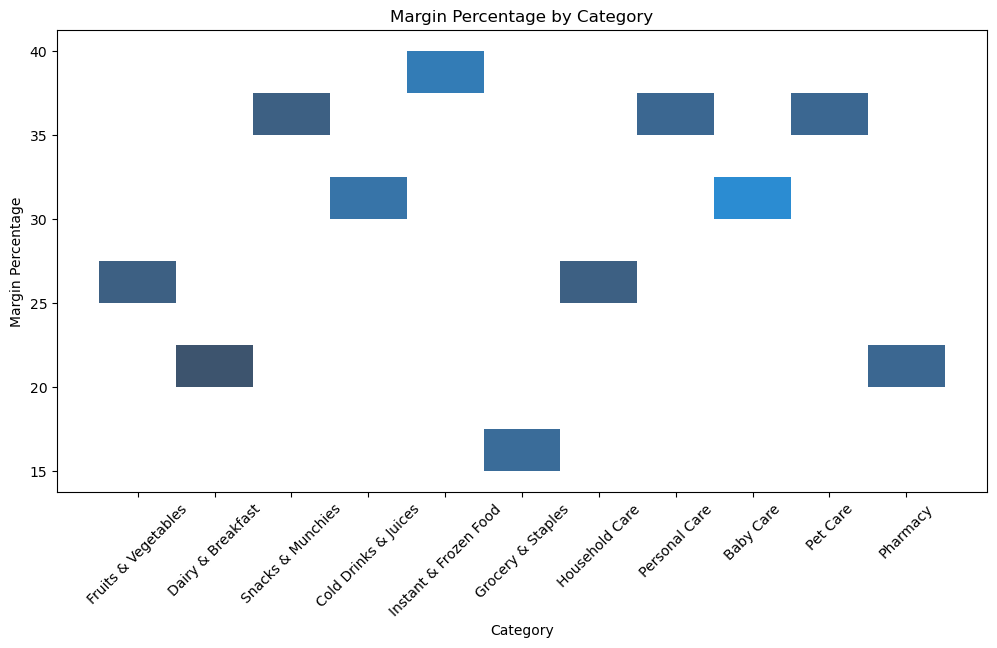

In [216]:
# margin percentage distribution across categories visual
plt.figure(figsize=(12,6))
ax = sns.histplot(data=product_df, x='category', y='margin_percentage')
plt.title('Margin Percentage by Category')
plt.xlabel('Category')
plt.ylabel('Margin Percentage')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

This plot shows how profit margins vary across product categories. It helps identify which categories yield higher profitability per unit sold. Margin percentage across all product varies widely, ranging from 15-40%. Grocery staples has the lowest MP at 15%, with the rest of the product categories falling in that 20-40% range.

In [217]:
# average price of products in each category (USD)
product_df.groupby('category')['price_usd'].mean()

category
Baby Care                6.193830
Cold Drinks & Juices     6.006180
Dairy & Breakfast        6.829156
Fruits & Vegetables      6.558422
Grocery & Staples        4.768290
Household Care           4.838333
Instant & Frozen Food    5.044140
Personal Care            5.299147
Pet Care                 6.563208
Pharmacy                 7.188322
Snacks & Munchies        5.005280
Name: price_usd, dtype: float64

/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_90449/4222827408.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


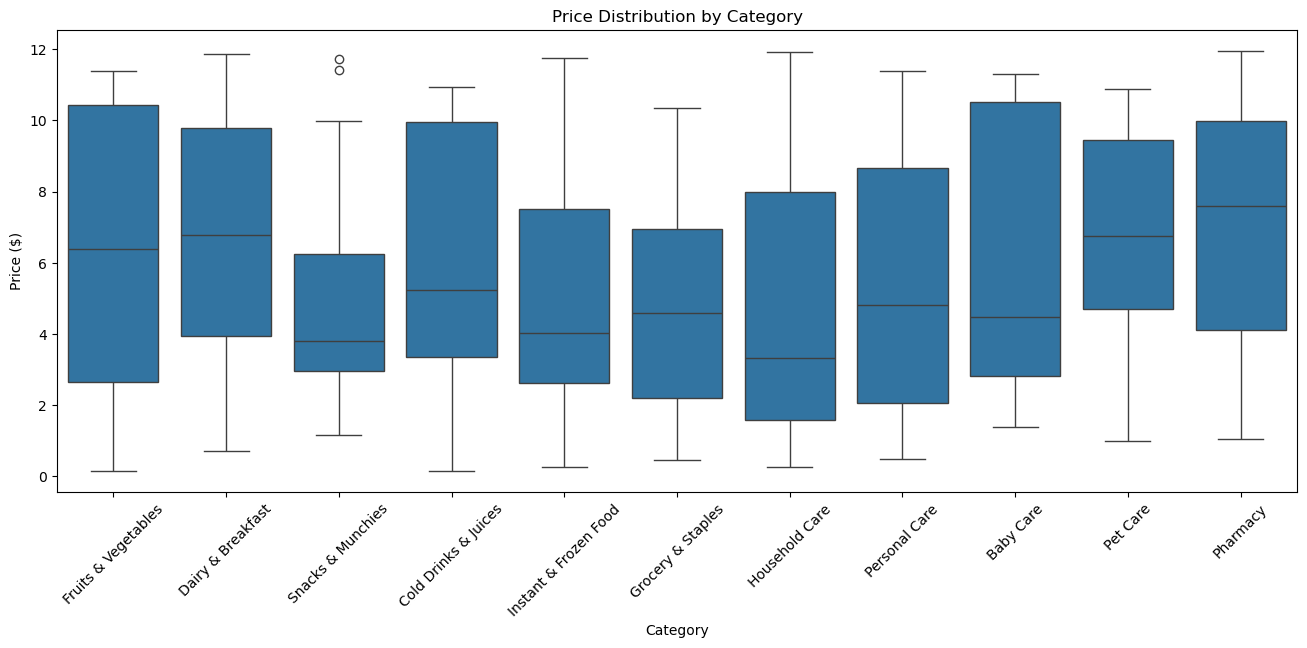

In [218]:
# price distribution across categories visual
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=product_df, x='category', y='price_usd')
plt.title('Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Price ($)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

This plot shows the distribution of product pricing within each category. This highlights pricing strategy differences or outlier products. Snacks and munchies stood out in having the lowest range in pricing as well as the lowest prices, though this category does have two outliers in the uppermost price range around $11.


In [219]:
# products with highest and lowest markup, mrp is in Rupees here, so I will use the non-converted prices to calculate markup
product_df['markup'] = product_df['mrp'] - product_df['price']
highest_markup = product_df.loc[product_df['markup'].idxmax()]
lowest_markup = product_df.loc[product_df['markup'].idxmin()]
print(f'The product with the highest markup is: {highest_markup}')
print(f'The product with the lowest markup is: {lowest_markup}')

The product with the highest markup is: product_id                          305754
product_name             Frozen Vegetables
category             Instant & Frozen Food
brand                         Mammen-Hegde
price                               979.99
mrp                                1633.32
margin_percentage                     40.0
shelf_life_days                        180
min_stock_level                         22
max_stock_level                         81
price_usd                         11.75988
markup                              653.33
Name: 110, dtype: object
The product with the lowest markup is: product_id                        654297
product_name                    Potatoes
category             Fruits & Vegetables
brand                      Chandran-Dass
price                              13.25
mrp                                17.67
margin_percentage                   25.0
shelf_life_days                        3
min_stock_level                       20
max_stock_l

#### **Stock & Inventory**

In [220]:
# category with the most products
max_prod = product_df['category'].value_counts().idxmax()
print (f'The category with the most amount of products is {max_prod}.')

The category with the most amount of products is Dairy & Breakfast.


In [221]:
# category with the least products
min_prod = product_df['category'].value_counts().idxmin()
print (f'The category with the least amount of products is {min_prod}.')

The category with the least amount of products is Baby Care.


## **File 2: Blinkit Deliveries**

This section analyzes delivery performance based on order and customer-level data, including promised and actual delivery times, delivery status (on-time, slightly delayed, significantly delayed), and operational details such as payment method, delivery partner ID, and store ID. The goal is to evaluate fulfillment reliability, order value and payment method insights. (Store-level and deliver-partner level analysis not available due to data limitations)


In [222]:
# loading csv into a dataframe
delivery_df = pd.read_csv('/Users/tovi/Desktop/Projects/Blinket-Sales/csv_files/blinkit_orders.csv')
delivery_df

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741
...,...,...,...,...,...,...,...,...,...,...
4995,1669690997,62600289,2023-12-25 15:46:20,2023-12-25 16:05:20,2023-12-25 16:10:20,On Time,1132.33,Cash,90914,1587
4996,8340761903,53640286,2023-11-27 09:18:43,2023-11-27 09:38:43,2023-11-27 09:36:43,On Time,2372.01,Cash,27952,3458
4997,5936301790,87059497,2024-06-21 19:09:09,2024-06-21 19:23:09,2024-06-21 19:26:09,On Time,3158.35,Cash,9590,7424
4998,5710579377,67310893,2024-06-06 14:58:13,2024-06-06 15:12:13,2024-06-06 15:10:13,On Time,1918.92,UPI,29940,6128


In [223]:
#checking shape
delivery_df.shape

(5000, 10)

In [224]:
# general descriptive stats
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                5000 non-null   int64  
 1   customer_id             5000 non-null   int64  
 2   order_date              5000 non-null   object 
 3   promised_delivery_time  5000 non-null   object 
 4   actual_delivery_time    5000 non-null   object 
 5   delivery_status         5000 non-null   object 
 6   order_total             5000 non-null   float64
 7   payment_method          5000 non-null   object 
 8   delivery_partner_id     5000 non-null   int64  
 9   store_id                5000 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 390.8+ KB


In [225]:
# checking for duplicates
delivery_df.duplicated().sum()

0

In [226]:
# converting delivery times to datetime format
delivery_df['order_date'] = pd.to_datetime(delivery_df['order_date'])
delivery_df['promised_delivery_time'] = pd.to_datetime(delivery_df['promised_delivery_time'])
delivery_df['actual_delivery_time'] = pd.to_datetime(delivery_df['actual_delivery_time'])

# creating column of delivery delay times and calculating delays in minutes
delivery_df['delivery_delay'] = (delivery_df['actual_delivery_time'] - delivery_df['promised_delivery_time']).dt.total_seconds() / 60

delivery_df.head()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id,delivery_delay
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771,-5.0
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534,2.0
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886,4.0
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917,-1.0
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741,1.0


In [227]:
# creating new column that converts order_total from Rupees to USD
delivery_df['order_total_usd'] = delivery_df['order_total'] * exchange_rate
delivery_df.head()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id,delivery_delay,order_total_usd
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771,-5.0,38.36484
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534,2.0,11.71860
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886,4.0,10.06860
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917,-1.0,5.28276
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741,1.0,30.32016


#### **Delivery Times & Delays**

In [228]:
# calculating how often deliveries are late
late_deliveries = (delivery_df['delivery_delay'] > 0).mean() * 100
print(f'Late deliveries: {late_deliveries:.2f}%')

Late deliveries: 61.96%


In [229]:
# calculating average delivery time for all orders
average_delivery_time = delivery_df['delivery_delay'].mean()
print(f'Average delivery time for all orders: {average_delivery_time:.2f} minutes')

Average delivery time for all orders: 4.44 minutes


In [230]:
# calculating average delivery time for on-time orders
on_time_deliveries = delivery_df[delivery_df['delivery_delay'] <= 0]
avg_on_time = on_time_deliveries['delivery_delay'].mean()

#convert negative value to positive value (numbers less than 0 represent early deliveries in the delivery_delay column)
avg_on_time = avg_on_time * -1
print(f'The average delivery time for on-time orders is: {avg_on_time:.2f} minutes')

The average delivery time for on-time orders is: 2.47 minutes


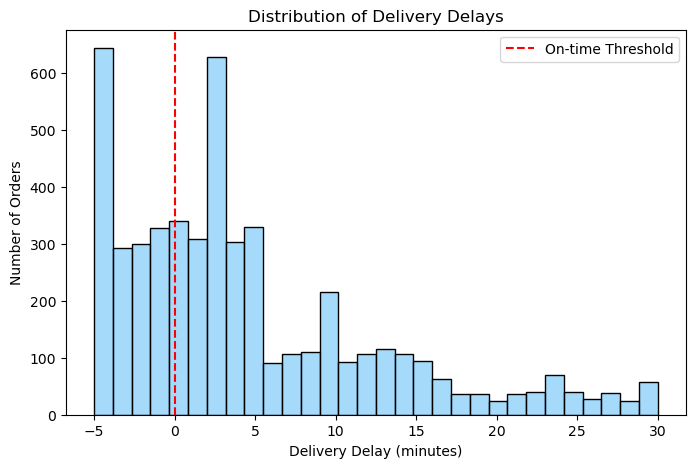

In [231]:
# creating visual of delivery time distribution
plt.figure(figsize=(8,5))
sns.histplot(delivery_df['delivery_delay'], bins=30, color='lightskyblue')
plt.axvline(0, color='red', linestyle='dashed', label='On-time Threshold')
plt.xlabel('Delivery Delay (minutes)')
plt.ylabel('Number of Orders')
plt.title('Distribution of Delivery Delays')
plt.legend()

# save to images folder
plt.savefig('images/delivery_delay_dist.png')
plt.show()


This histogram reveals the spread of delivery times, helping us understand performance variability and customer experience. A significant amount of orders (~650), were deliverede either 5 minutes early, or around 3 minutes late. Most of the orders fall past the on-time threshold. For the most part, the amount of orders steadily declines as the delivery delay in minutes increases.

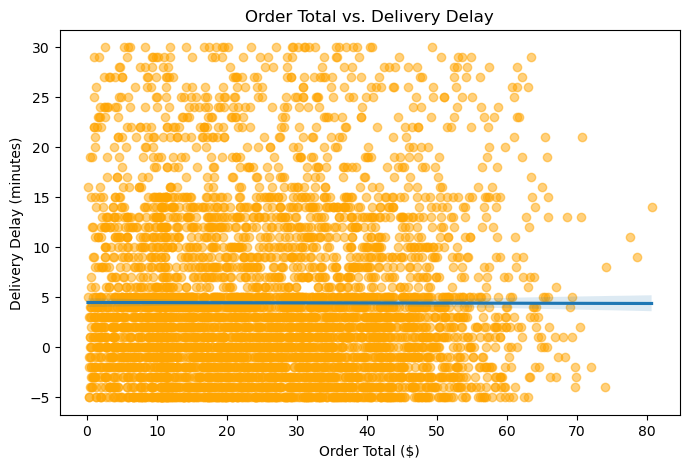

Correlation between order total and delivery delay: -0.00


In [232]:
# scatter plot with regression line to explore possible correlation between order total and delay times
plt.figure(figsize=(8,5))
sns.regplot(x=delivery_df['order_total_usd'], y=delivery_df['delivery_delay'], scatter_kws={'alpha':0.5, 'color':'orange'})
plt.xlabel('Order Total ($)')
plt.ylabel('Delivery Delay (minutes)')
plt.title('Order Total vs. Delivery Delay')
plt.show()

# Correlation coefficient
correlation = delivery_df[['order_total_usd', 'delivery_delay']].corr().iloc[0,1]
print(f'Correlation between order total and delivery delay: {correlation:.2f}')

Here, I check if there's a relationship between order value and delivery speed. This could suggest prioritization or some sort of operational strain. There is no correlaition between order total and any delivery delays. This suggests fairness accross all orders. There could be an opportunity here to implement prioritization of high-value orders via decreased delivery times or special handling to encourag ecustomers to place high-value orders.


In [233]:
# calculating rate of on-time deliveries for all stores
store_punctuality = delivery_df.groupby('store_id')['delivery_delay'].apply(lambda x: (x <= 0).mean()).sort_values(ascending=False)
print(store_punctuality)

store_id
1       1.0
5172    1.0
5116    1.0
5119    1.0
5121    1.0
       ... 
5323    0.0
5324    0.0
5325    0.0
5326    0.0
9995    0.0
Name: delivery_delay, Length: 5000, dtype: float64


In [234]:
# calculating rate of late deliveries for all stores
store_punctuality = delivery_df.groupby('store_id')['delivery_delay'].apply(lambda x: (x > 0).mean()).sort_values(ascending=False)
print(store_punctuality)

store_id
9995    1.0
4826    1.0
4635    1.0
4638    1.0
4639    1.0
       ... 
4864    0.0
4867    0.0
4870    0.0
4877    0.0
4988    0.0
Name: delivery_delay, Length: 5000, dtype: float64


In [235]:
# counting late deliveries per partner and sorting to view partners with the most late deliveries
late_per_partner = delivery_df[delivery_df['delivery_delay'] > 0].groupby('delivery_partner_id').size().sort_values(ascending=False)
print(late_per_partner)

delivery_partner_id
43       1
65328    1
66248    1
66274    1
66328    1
        ..
34338    1
34344    1
34392    1
34427    1
99968    1
Length: 3098, dtype: int64


In [236]:
# variation in number of late deliveries by partners
late_per_partner.nunique()

1

In [237]:
# calculating average order total for each customer
customer_avg_order = delivery_df.groupby('customer_id')['order_total_usd'].mean()
print(customer_avg_order.describe())

count    2172.000000
mean       26.312350
std        11.986413
min         0.265680
25%        17.921440
50%        26.115380
75%        33.591955
max        73.937760
Name: order_total_usd, dtype: float64


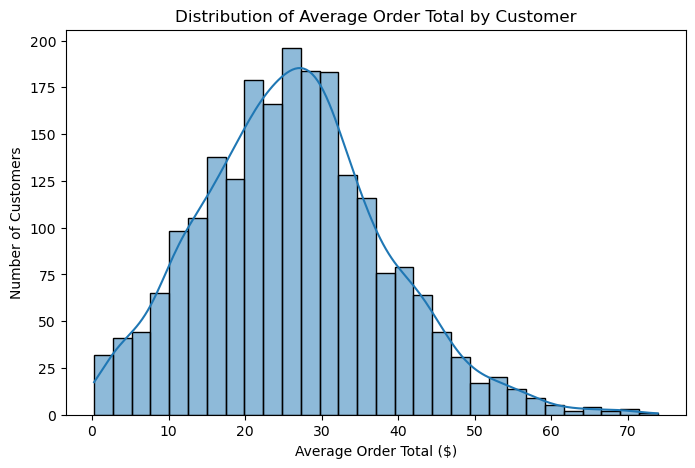

In [238]:
# creating visual for distribution of average order total by customer
plt.figure(figsize=(8,5))
sns.histplot(customer_avg_order, bins=30, kde=True)
plt.xlabel('Average Order Total ($)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Average Order Total by Customer')
plt.show()

This histogram visualizes how average order values vary across customers, helping to see typical spending behavior. Order values are distributed normally, indicating that pricing strategy, product assortment, and customer behaviors are likely very well balanced and understood. However, it appears customers with very high order totals are much less frequent than those with very low order totals. This graph suggests that there is room for efforts to attract and retain more high-value customers.


In [239]:
# calculating the average number or orders placed by each customer
avg_customer_orders = delivery_df['customer_id'].value_counts().mean()
print(f'Customers place an average of {avg_customer_orders:.2f} orders')

Customers place an average of 2.30 orders


In [240]:
# calculating which customers have placed the most orders
customer_orders = delivery_df['customer_id'].value_counts().head(40)
print(customer_orders)

customer_id
77869660    9
8791577     8
17805991    8
13604883    7
93018527    7
26285589    7
21701991    7
75213636    7
10562528    7
25128143    7
12832151    7
20163931    6
31940833    6
47625855    6
92404798    6
80571942    6
11478478    6
4597433     6
80517784    6
67708491    6
20148223    6
65514005    6
41640262    6
93924203    6
84824280    6
44410149    6
61618079    6
30823988    6
98444183    6
93563435    6
61753272    6
46623192    6
22210238    6
90448312    6
9274874     6
57291761    6
54923640    6
20956158    6
38420886    6
28663279    5
Name: count, dtype: int64


In [241]:
# calculating frequncy of each payment method used
payment_counts = delivery_df['payment_method'].value_counts()

payment_percentages = delivery_df['payment_method'].value_counts(normalize=True) * 100

payment_summary = pd.DataFrame({
    'Count': payment_counts,
    'Percentage': payment_percentages.round(2)
})

print(payment_summary)

                Count  Percentage
payment_method                   
Card             1285       25.70
Cash             1257       25.14
Wallet           1244       24.88
UPI              1214       24.28


/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_90449/38894962.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='mako')


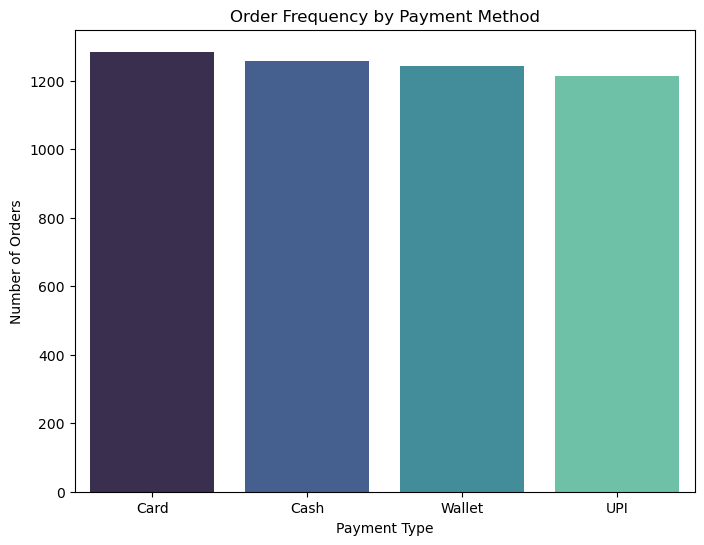

In [242]:
# visual for order frequency across payment methods
plt.figure(figsize=(8,6))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='mako')
plt.xlabel('Payment Type')
plt.ylabel('Number of Orders')
plt.title('Order Frequency by Payment Method')
plt.show()

This bar chart compares how often different payment methods are used, useful for understanding customer preferences. Payment type appears even across the board.

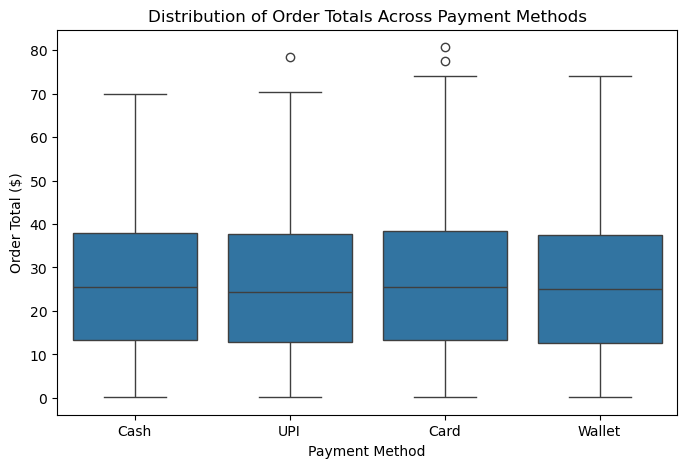

In [243]:
# creating visual to compare order totals across payment methods
plt.figure(figsize=(8,5))
sns.boxplot(x='payment_method', y='order_total_usd', data=delivery_df)
plt.xlabel('Payment Method')
plt.ylabel('Order Total ($)')
plt.title('Distribution of Order Totals Across Payment Methods')
plt.show()

This plot shows the distribution of order totals across payment types. It appears even for the most part, with Card and Wallet payment method having a slightly higher order total range than Cash and UPI.

In [244]:
# which stores have received the most amount of orders
store_order_counts = delivery_df['store_id'].value_counts().sort_values(ascending=False)
print(store_order_counts)

store_id
4771    1
2463    1
2741    1
3442    1
1318    1
       ..
3458    1
7424    1
6128    1
3078    1
5588    1
Name: count, Length: 5000, dtype: int64


In [245]:
# which partners have delivered the most orders
partner_order_counts = delivery_df['delivery_partner_id'].value_counts()
print(partner_order_counts)

delivery_partner_id
63230    1
53453    1
67163    1
81625    1
48217    1
        ..
13251    1
24901    1
75375    1
63631    1
32851    1
Name: count, Length: 5000, dtype: int64


In [246]:
# no variation in number of deliveries per partner
partner_order_counts.nunique()

1

In [247]:
# no variation in delivery delay per store as each store only has one order assigned to it
delivery_df['store_id'].nunique()

5000

## **File 3: Blinket Order Items**

This section focuses on product-level order data, analyzing how many units of each item were purchased and at what price. Using order and product identifiers, unit quantities, and unit pricing, I explore product demand patterns, top-selling items, and revenue contribution. This analysis helps guide inventory priorities and pricing opportunities for high-performing SKUs.


In [248]:
units_df = pd.read_csv('/Users/tovi/Desktop/Projects/Blinket-Sales/csv_files/blinkit_order_items.csv')
units_df

,order_id,product_id,quantity,unit_price
0,1961864118,642612,3,517.03
1,1549769649,378676,1,881.42
2,9185164487,741341,2,923.84
3,9644738826,561860,1,874.78
4,5427684290,602241,2,976.55
...,...,...,...,...
4995,1669690997,925482,3,475.04
4996,8340761903,124290,2,39.65
4997,5936301790,491314,3,973.44
4998,5710579377,319388,2,657.80


In [249]:
units_df.describe()

,order_id,product_id,quantity,unit_price
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,5.029129e+09,509974.939600,2.006800,493.157900
std,2.863533e+09,293678.307475,0.820542,298.075647
min,6.046500e+04,4452.000000,1.000000,12.320000
25%,2.531421e+09,257719.000000,1.000000,227.220000
50%,5.074378e+09,540618.000000,2.000000,448.160000
75%,7.488579e+09,747801.000000,3.000000,781.080000
max,9.998298e+09,993331.000000,3.000000,995.980000


In [250]:
units_df.shape

(5000, 4)

In [251]:
units_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    5000 non-null   int64  
 1   product_id  5000 non-null   int64  
 2   quantity    5000 non-null   int64  
 3   unit_price  5000 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 156.4 KB


In [252]:
# checking for duplicates
units_df.duplicated().sum()

0

In [253]:
# checking for null values
null_check = units_df.isnull().sum()
print(null_check)

order_id      0
product_id    0
quantity      0
unit_price    0
dtype: int64


In [254]:
# creating new column that holds total order value
units_df['total_price'] = units_df['quantity'] * units_df['unit_price']
print(units_df.head())  # Display the first few rows to confirm the new column


     order_id  product_id  quantity  unit_price  total_price
0  1961864118      642612         3      517.03      1551.09
1  1549769649      378676         1      881.42       881.42
2  9185164487      741341         2      923.84      1847.68
3  9644738826      561860         1      874.78       874.78
4  5427684290      602241         2      976.55      1953.10


In [255]:
# creating new columns to hold unit price and total price in USD
units_df['unit_price_usd']= units_df['unit_price'] * exchange_rate
units_df['total_price_usd'] = units_df['unit_price_usd'] * units_df['quantity']

units_df.head()

,order_id,product_id,quantity,unit_price,total_price,unit_price_usd,total_price_usd
0,1961864118,642612,3,517.03,1551.09,6.20436,18.61308
1,1549769649,378676,1,881.42,881.42,10.57704,10.57704
2,9185164487,741341,2,923.84,1847.68,11.08608,22.17216
3,9644738826,561860,1,874.78,874.78,10.49736,10.49736
4,5427684290,602241,2,976.55,1953.10,11.71860,23.43720


#### **Orders & Products**

In [256]:
# calculating most frequently ordered products
top_products = units_df.groupby('product_id')['quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)

product_id
51036     70
820973    68
604184    62
34186     61
992178    60
880510    58
673058    56
89084     56
557908    55
123983    55
Name: quantity, dtype: int64


/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_90449/1862474639.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='viridis', order=top_products.index)


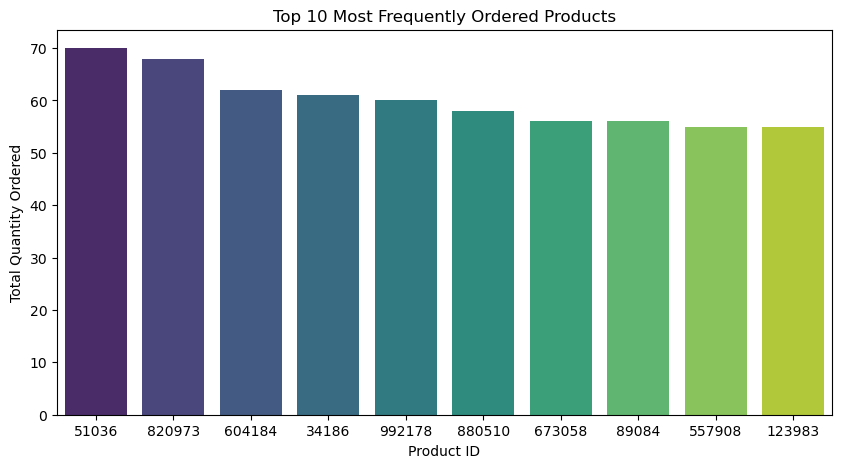

In [257]:

# creating visual for most ordered products
top_products = top_products.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.index, y=top_products.values, palette='viridis', order=top_products.index)

plt.xlabel('Product ID')
plt.ylabel('Total Quantity Ordered')
plt.title('Top 10 Most Frequently Ordered Products')
plt.show()

This plot ranks products by quantity ordered, highlighting customer favorites and potential stock prioritization targets.

In [258]:
# calulating average order value (USD)
order_totals = units_df.groupby('order_id')['total_price_usd'].sum()
average_order_value = order_totals.mean()
print(f'Average Order Value: ${average_order_value:.2f}')

Average Order Value: $11.93


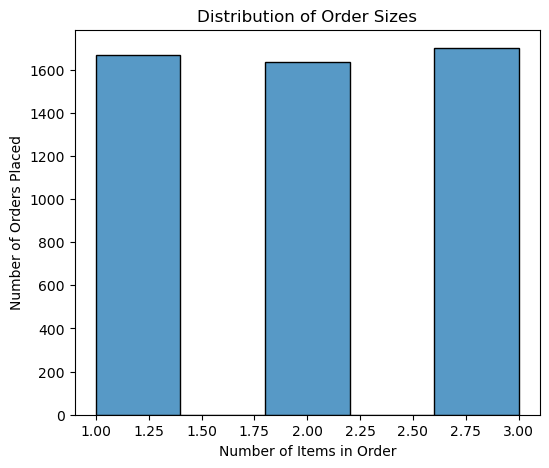

In [259]:
# creating visual for distribution of order values
order_sizes = units_df.groupby('order_id')['quantity'].sum()

plt.figure(figsize=(6,5))
sns.histplot(order_sizes, bins=5)
plt.xlabel('Number of Items in Order')
plt.ylabel('Number of Orders Placed')
plt.title('Distribution of Order Sizes')
plt.show()

This distribution plot helps assess the typical number of units in an order, providing a bit of insight into customer purchasing behavior. The number of items per order falls into 3 distinct groups, and the number of orders placed within those groups are all very similar.


In [260]:
# order size general stats
print(order_sizes.describe())

count    5000.000000
mean        2.006800
std         0.820542
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: quantity, dtype: float64


In [261]:
# product generating the most revenue
product_revenue = units_df.groupby('product_id')['total_price_usd'].sum()

max_revenue_prod = product_revenue.idxmax()
max_revenue = max_revenue_prod.max()
print(f'The product ID that generated the most revenue is: {max_revenue}.')

The product ID that generated the most revenue is: 51036.


In [262]:
# top 10 products generating the most revenue
max_product_revenue = units_df.groupby('product_id')['total_price_usd'].sum().sort_values(ascending=False)

print(max_product_revenue.head(10))

product_id
51036     782.55240
34186     677.57580
880510    662.19528
557908    621.96420
264803    621.49152
739534    584.80128
18035     558.10944
883013    546.41376
349294    538.41600
112390    526.78800
Name: total_price_usd, dtype: float64


/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_90449/2002046224.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_products.index, y=top_10_products.values, palette='viridis', order=top_10_products.index)


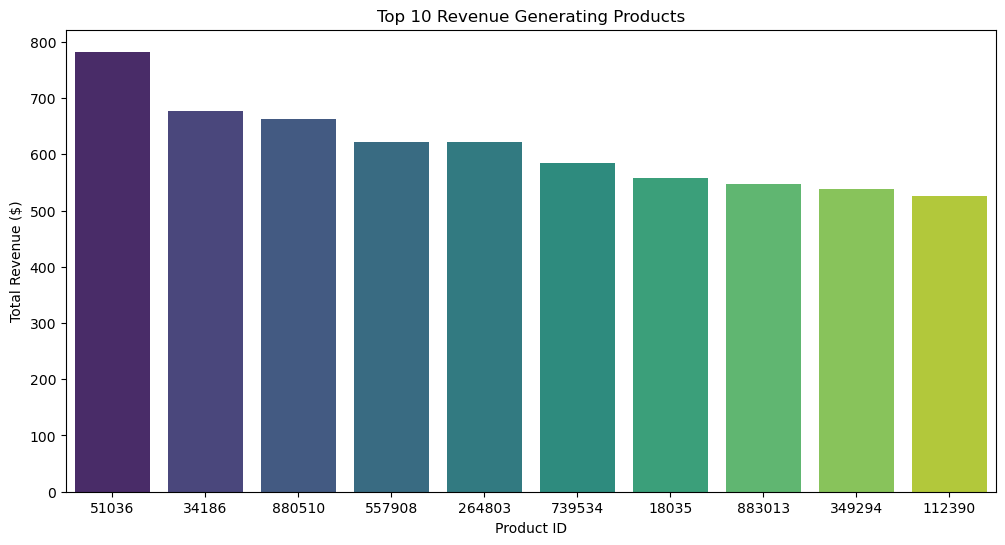

In [381]:
# visual for top 10 products generating the most revenue
top_10_products = max_product_revenue.nlargest(10)
top_10_products = top_10_products.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_products.index, y=top_10_products.values, palette='viridis', order=top_10_products.index)

plt.xlabel('Product ID')
plt.ylabel('Total Revenue ($)')
plt.title('Top 10 Revenue Generating Products')

# save to images folder
plt.savefig('images/top_10_rev_products.png')
plt.show()

Products that contribute the most to revenue are identified here — these are high-priority for inventory and promotions.

In [264]:
# product generating the least revenue
min_revenue_prod = product_revenue.idxmin()
min_revenue = min_revenue_prod.min()
print(f'The product ID that generated the least revenue is: {min_revenue}.')

The product ID that generated the least revenue is: 118820.


In [265]:
# top 10 products generating the least revenue
min_product_revenue = units_df.groupby('product_id')['total_price_usd'].sum().sort_values()
print(min_product_revenue.head(10))

product_id
118820     4.43520
654297     5.72400
962054     6.06960
652118     8.99232
767398     9.03312
300159    11.17620
709916    13.77408
133542    13.97196
473647    15.49800
968887    19.04760
Name: total_price_usd, dtype: float64


/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_90449/3140536586.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10_products.index, y=bottom_10_products.values, palette='viridis', order=bottom_10_products.index)


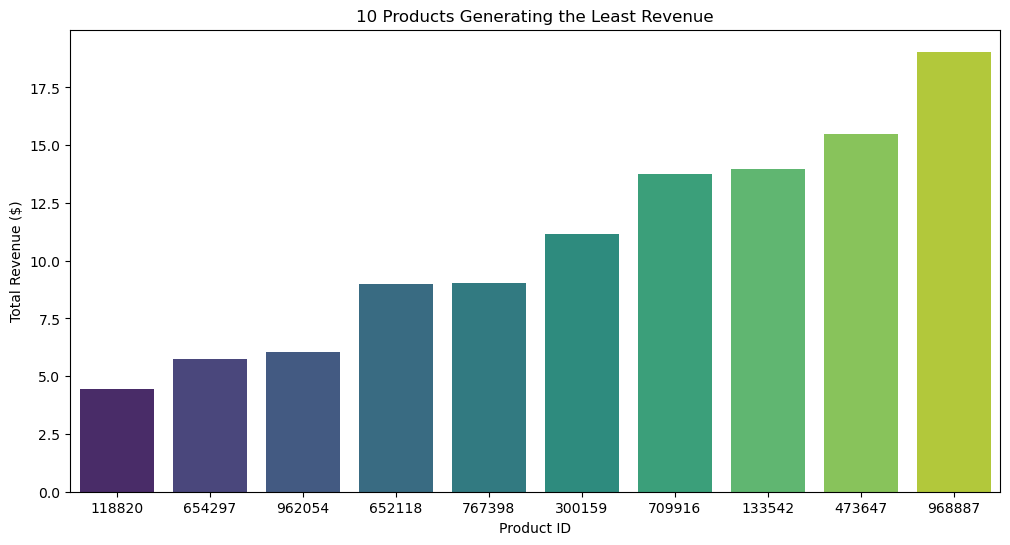

In [266]:
# visual for top 10 products generating the least revenue
bottom_10_products = min_product_revenue.nsmallest(10)
bottom_10_products = bottom_10_products.sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_10_products.index, y=bottom_10_products.values, palette='viridis', order=bottom_10_products.index)

plt.xlabel('Product ID')
plt.ylabel('Total Revenue ($)')
plt.title('10 Products Generating the Least Revenue')
plt.show()

Products that underperform in revenue are highlighted. They may need pricing adjustments or marketing support.

In [267]:
# price distribution general stats
units_df['unit_price_usd'].describe()

count    5000.000000
mean        5.917895
std         3.576908
min         0.147840
25%         2.726640
50%         5.377920
75%         9.372960
max        11.951760
Name: unit_price_usd, dtype: float64

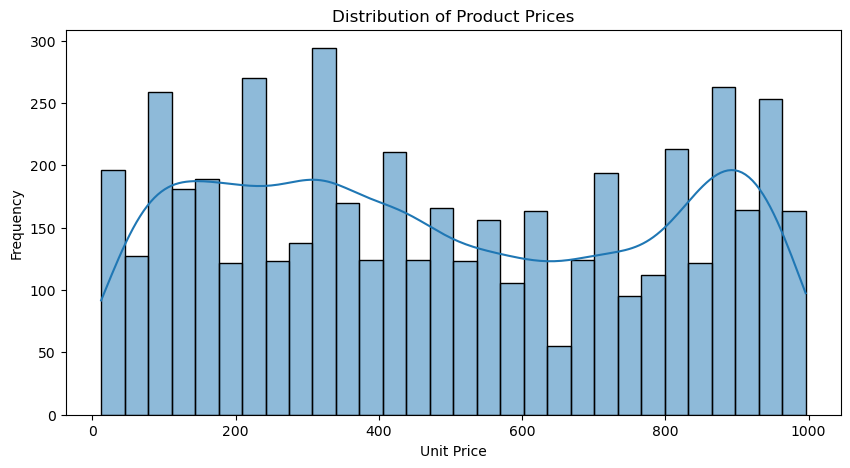

In [268]:
# creating visual for product pricing distrubution
plt.figure(figsize=(10,5))
sns.histplot(units_df['unit_price'], bins=30, kde=True)
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Distribution of Product Prices')
plt.show()

This plot gives a broader view of pricing trends and outliers in the product catalog. This histogram is multimodal, indicating distince product pricing.

## **File 4: Blinkit Marketing Performance**

This section evaluates the effectiveness of Blinkit's marketing campaigns using data on impressions, clicks, conversions, spend, and revenue generated. Each record includes campaign identifiers, target audience, marketing channel, and campaign dates. My analysis here focuses on key performance metrics such as click-through rate (CTR), conversion rate, return on ad spend (ROAS), and customer acquisition cost (CAC). Visual breakdowns by channel, audience type, and campaign group are used to uncover which strategies delivered the strongest ROI and where marketing resources can be optimized.

In [414]:
mkt_df = pd.read_csv('/Users/tovi/Desktop/Projects/Blinket-Sales/csv_files/blinkit_marketing_performance.csv')
mkt_df

,campaign_id,campaign_name,date,target_audience,channel,impressions,clicks,conversions,spend,revenue_generated,roas
0,548299,New User Discount,2024-11-05,Premium,App,3130,163,78,1431.85,4777.75,3.34
1,390914,Weekend Special,2024-11-05,Inactive,App,3925,494,45,4506.34,6238.11,1.38
2,834385,Festival Offer,2024-11-05,Inactive,Email,7012,370,78,4524.23,2621.00,0.58
3,241523,Flash Sale,2024-11-05,Inactive,SMS,1115,579,86,3622.79,2955.00,0.82
4,595111,Membership Drive,2024-11-05,New Users,Email,7172,795,54,2888.99,8951.81,3.10
...,...,...,...,...,...,...,...,...,...,...,...
5395,381623,Membership Drive,2023-03-17,New Users,Email,8331,809,92,2363.07,3710.79,1.57
5396,493317,Category Promotion,2023-03-17,Premium,Social Media,5216,860,34,3922.53,7701.25,1.96
5397,879292,App Push Notification,2023-03-17,All,App,8480,734,20,1990.75,6650.41,3.34
5398,461129,Email Campaign,2023-03-17,New Users,Email,3569,568,10,4246.47,5880.42,1.38


In [415]:
mkt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   campaign_id        5400 non-null   int64  
 1   campaign_name      5400 non-null   object 
 2   date               5400 non-null   object 
 3   target_audience    5400 non-null   object 
 4   channel            5400 non-null   object 
 5   impressions        5400 non-null   int64  
 6   clicks             5400 non-null   int64  
 7   conversions        5400 non-null   int64  
 8   spend              5400 non-null   float64
 9   revenue_generated  5400 non-null   float64
 10  roas               5400 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 464.2+ KB


In [271]:
mkt_df.shape

(5400, 11)

In [272]:
mkt_df.duplicated().sum()

0

In [273]:
# creating new column to contain converted spend amounts
mkt_df['spend_usd'] = mkt_df['spend'] * exchange_rate
mkt_df['revenue_generated_usd'] = mkt_df['revenue_generated'] * exchange_rate
mkt_df.head()

,campaign_id,campaign_name,date,target_audience,channel,impressions,clicks,conversions,spend,revenue_generated,roas,spend_usd,revenue_generated_usd
0,548299,New User Discount,2024-11-05,Premium,App,3130,163,78,1431.85,4777.75,3.34,17.18220,57.33300
1,390914,Weekend Special,2024-11-05,Inactive,App,3925,494,45,4506.34,6238.11,1.38,54.07608,74.85732
2,834385,Festival Offer,2024-11-05,Inactive,Email,7012,370,78,4524.23,2621.00,0.58,54.29076,31.45200
3,241523,Flash Sale,2024-11-05,Inactive,SMS,1115,579,86,3622.79,2955.00,0.82,43.47348,35.46000
4,595111,Membership Drive,2024-11-05,New Users,Email,7172,795,54,2888.99,8951.81,3.10,34.66788,107.42172


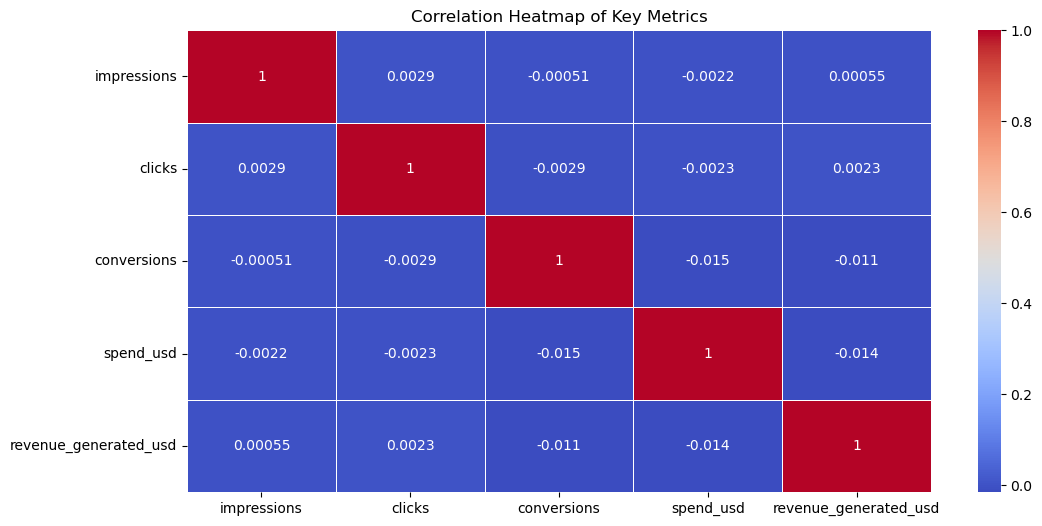

In [274]:
# creating heatmap to view correlation amongst marketing metrics
plt.figure(figsize=(12, 6))
sns.heatmap(mkt_df[['impressions', 'clicks', 'conversions', 'spend_usd', 'revenue_generated_usd']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Key Metrics')
plt.show()

This correlation heatmap helps detect relationships between marketing KPIs like impressions, clicks, and conversions. ROAS was excluded as it is a ratio and derived metric. Based on the heatmap it appears the metrics are not related in a linear fashion. This suggests the data contains many non-linear patterns such as diminishing returns, so I will explore relationships further using other methods.

##### **ROAS Breakdown**

**NOTE: Weighted vs. Unweighted ROAS**

In comparing my Python and SQL analysis values, I noticed the average roas values across marketing segments produced different values. This is likely due to the different appraoches each language uses:
- My SQL query calculates ROAS as [ROAS = Total Revenue / Total Spend]. This aggregates revenue and spend before division, which ensures that larger campaigns contribute proportionally to the final ROAS value. It reflects how much return the business generated per dollar spent across the entire campaign portfolio, making it better for executive decision-making. If one campaign spent $10,000 and another $100, their performance is not treated equally — the larger investment rightfully has more weight.

- In Python, the unweighted ROAS was calculated by first computing ROAS per campaign and then averaging these values using [ROAS = Average of (Revenue / Spend)]. This approach treats each campaign equally, ignoring budget size. While it can skew high or low due to outliers (ex: small campaigns with unusually high ROAS), it is useful for exploring variability, identifying overperforming niche campaigns, and understanding potential anomalies.

In short:
- **Weighted ROAS** (SQL-aligned) Reflects business-level return, influenced by campaign size.
- **Unweighted ROAS** (Python row-average) Captures volatility and outliers.

The weighted ROAS is more appropriate for high-level decision-making, so these are the numbers that will appear in the Business Intelligence Report as well as the dashboard. The calculations for the unweighted averages are helpful for evaluating individual campaign efficiency, and are better suited for internal use. Therefore, these numbers are included below:


In [275]:
# get details on the campaign that currently has the highest return on ad spend
highest_roas_campaign = mkt_df.loc[mkt_df['roas'].idxmax(), ['campaign_id', 'campaign_name', 'date', 'target_audience', 'channel', 'roas', 'spend_usd', 'revenue_generated_usd']]
highest_roas_campaign

campaign_id                             552750
campaign_name            App Push Notification
date                                2023-10-26
target_audience                      New Users
channel                           Social Media
roas                                      9.68
spend_usd                             12.08076
revenue_generated_usd                116.94996
Name: 3390, dtype: object

In [437]:
# (Python), calculating unweighted roas by campgain group

# Filter out rows with zero spend to avoid division errors
unweighted_df = mkt_df[mkt_df['spend'] > 0].copy()

roas_by_campaign_unweighted = unweighted_df.groupby('campaign_name')['roas'].mean().sort_values(ascending=False).reset_index()


# present overall average roas for all campaign groups
overall_unweighted_roas = roas_by_campaign_unweighted['roas'].mean()
print(f'Average unweighted ROAS: {overall_unweighted_roas:.2f}')

# present all roas for all campaign groups
roas_by_campaign_unweighted


Average unweighted ROAS: 2.38


,campaign_name,roas
0,App Push Notification,2.429833
1,Referral Program,2.420017
2,Email Campaign,2.407167
3,Weekend Special,2.396100
4,Flash Sale,2.380067
5,New User Discount,2.373950
6,Membership Drive,2.351900
7,Festival Offer,2.337050
8,Category Promotion,2.320967


In [435]:
# SQL-ALIGNED, calculating weighted roas by campaign group

# filter out any zero-conversion or zero-spend campaigns
weighted_df = mkt_df[(mkt_df['spend'] > 0) & (mkt_df['conversions'] > 0)]

# group by campaign name
roas_by_campaign_weighted = weighted_df.groupby('campaign_name')[['revenue_generated', 'spend']].sum().assign(roas=lambda x: (x['revenue_generated'] / x['spend'])).sort_values('roas', ascending=False)

roas_by_campaign_weighted.reset_index(inplace=True)

# present overall average roas for all campaign groups
overall_weighted_roas = roas_by_campaign_weighted['roas'].mean()
print(f'Average weighted ROAS: {overall_weighted_roas:.2f}')

# present all roas for all campaign groups
roas_by_campaign_weighted


Average weighted ROAS: 1.97


,campaign_name,revenue_generated,spend,roas
0,Referral Program,3691382.60,1818025.51,2.030435
1,Email Campaign,3601785.22,1810729.67,1.989135
2,App Push Notification,3554370.00,1788989.20,1.986803
3,Weekend Special,3571451.83,1799611.29,1.984568
4,Membership Drive,3524951.25,1790069.80,1.969170
5,New User Discount,3603860.17,1833454.81,1.965612
6,Festival Offer,3507063.91,1796687.14,1.951961
7,Flash Sale,3556087.02,1831687.82,1.941426
8,Category Promotion,3582455.37,1850583.00,1.935852


In [277]:
# calculating total spend per campaign group
spend_per_campaign = mkt_df.groupby('campaign_name')['spend_usd'].sum().sort_values(ascending=False).reset_index()
spend_per_campaign

,campaign_name,spend_usd
0,Category Promotion,22206.99600
1,New User Discount,22001.45772
2,Flash Sale,21980.25384
3,Referral Program,21816.30612
4,Email Campaign,21728.75604
5,Weekend Special,21595.33548
6,Festival Offer,21560.24568
7,Membership Drive,21480.83760
8,App Push Notification,21467.87040


Spending across campaigns holds little variance, with a ~$800 difference between the highest and lowest-spend campaign. Top spending went to campaigns that did not rank as high in terms of ROAS. App Push Notifications, Email campaigns, and Referral Programs are campaigns that return the highest ROAS, but the top three slots for spending went to other campaigns. 

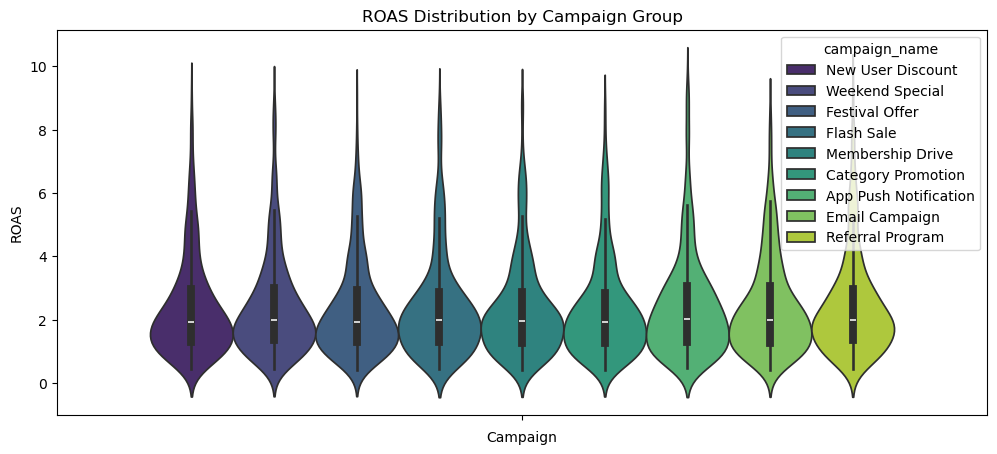

In [445]:
# visual for ROAS across campaign groups
plt.figure(figsize=(12, 5))
sns.violinplot(hue='campaign_name', y='roas', data=mkt_df, palette='viridis')
plt.title('ROAS Distribution by Campaign Group')
plt.xlabel('Campaign')
plt.ylabel('ROAS')
plt.show()

This plot compares ROAS performance across different campaign strategies, which can inform budget reallocation. Though App Push Notification Campaigns have the highest average ROAS, across all campaign groups ROAS incredibly similar with little variation.

In [279]:
# identifying the total spend for each marketing channel
spend_per_channel = mkt_df.groupby('channel')['spend_usd'].sum().sort_values(ascending=False).reset_index()
spend_per_channel

,channel,spend_usd
0,App,50560.54500
1,Social Media,49324.36692
2,SMS,47983.29048
3,Email,47969.85648


In [439]:
# average ROAS across channels (Python-, unweighted)
roas_per_channel = unweighted_df.groupby('channel')['roas'].mean().reset_index()
roas_per_channel = roas_per_channel.sort_values(by='roas', ascending=False)
roas_per_channel

,channel,roas
1,Email,2.489792
2,SMS,2.383142
3,Social Media,2.340246
0,App,2.307191


In [442]:
# average ROAS across channels (SQL-aligned, weighted)
roas_by_channel_weighted = mkt_df.groupby('channel')[['revenue_generated', 'spend']].sum().assign(roas=lambda x: x['revenue_generated'] / x['spend']).sort_values('roas', ascending=False).reset_index()
roas_by_channel_weighted

,channel,revenue_generated,spend,roas
0,Email,8189331.58,3997488.04,2.048619
1,SMS,7938649.32,3998607.54,1.985353
2,Social Media,7990415.98,4110363.91,1.943968
3,App,8075010.49,4213378.75,1.916517


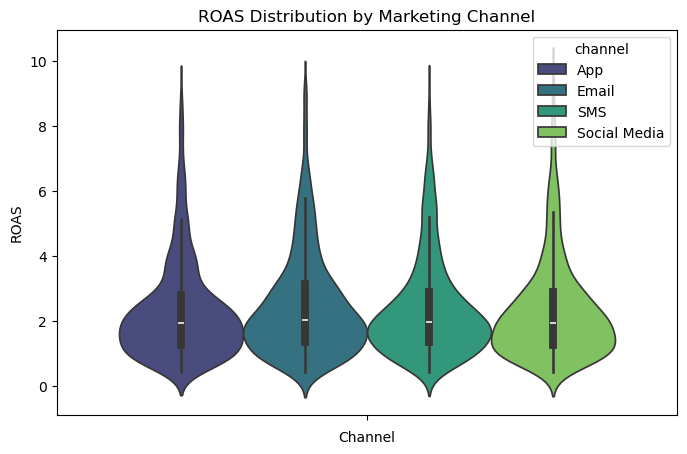

In [446]:
# visual for the distribution and density of ROAS across different channels
plt.figure(figsize=(8, 5))
sns.violinplot(hue='channel', y='roas', data=mkt_df, palette='viridis')
plt.title('ROAS Distribution by Marketing Channel')
plt.xlabel('Channel')
plt.ylabel('ROAS')
plt.show()

This density plot provide a detailed view of ROAS distribution by channel, helping assess variability. Here ROAS across marketing channels is flat.

In [443]:
# getting average ROAS by audience type (Python, unweighted)
roas_by_audience = unweighted_df.groupby('target_audience')['roas'].mean().sort_values(ascending=False).reset_index()
roas_by_audience

,target_audience,roas
0,New Users,2.433422
1,Inactive,2.418062
2,Premium,2.372192
3,All,2.294382


In [444]:
# average ROAS across channels (SQL-aligned, weighted)
roas_by_audience_weighted = mkt_df.groupby('target_audience')[['revenue_generated', 'spend']].sum().assign(roas=lambda x: x['revenue_generated'] / x['spend']).sort_values('roas', ascending=False).reset_index()
roas_by_audience_weighted

,target_audience,revenue_generated,spend,roas
0,New Users,8142498.88,4082313.37,1.994580
1,Inactive,8105791.01,4077275.86,1.988041
2,Premium,7966479.19,4049941.41,1.967060
3,All,7978638.29,4110307.60,1.941129


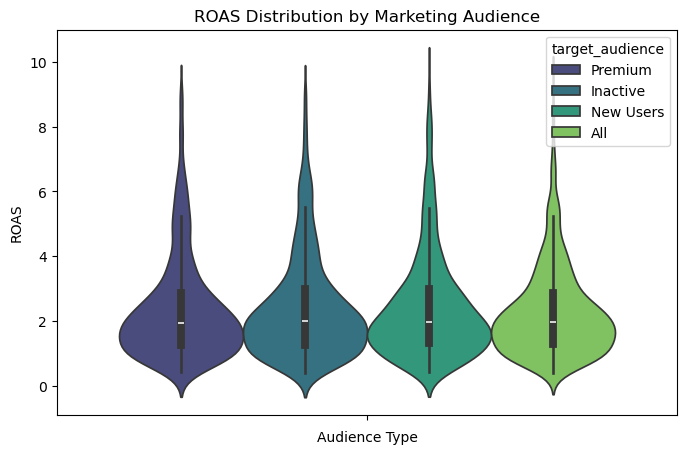

In [283]:
# visual for ROAS by audience type
# visual for the distribution and density of ROAS across different channels
plt.figure(figsize=(8, 5))
sns.violinplot(hue='target_audience', y='roas', data=mkt_df, palette='viridis')
plt.title('ROAS Distribution by Marketing Audience')
plt.xlabel('Audience Type')
plt.ylabel('ROAS')
plt.show()

This bar chart examines how different audience segments perform in terms of ROAS, useful for targeting strategy. ROAS across all audiences is flat.

#### **Conversion Rate Breakdown**

In [448]:
# creating  new column that holds calculated conversion rates
mkt_df['conversion_rate'] = mkt_df['conversions'] / mkt_df['clicks']

# getting the campaign that had the highest conversion rate
highest_conversion_rate_campaign = mkt_df.loc[mkt_df['conversion_rate'].idxmax(), ['campaign_name', 'conversion_rate', 'revenue_generated','channel', 'campaign_id']]
highest_conversion_rate_campaign

campaign_name        Festival Offer
conversion_rate                0.94
revenue_generated           3074.89
channel                Social Media
campaign_id                  236107
Name: 3440, dtype: object

In [451]:
# getting number of campaigns that are under-performing
underperforming_threshold = 2.0 # setting threshold at 2, anything returning less than double will be considered underperforming


underperforming_df = mkt_df[mkt_df['roas'] < underperforming_threshold]

# getting total number of underperfoming campaigns to compare to total number of campaigns
underperforming_count = underperforming_df['campaign_id'].nunique()
total_campaigns = mkt_df['campaign_id'].nunique()

# calculate pct
underperforming_pct = (underperforming_count / total_campaigns) * 100


print(f'Number of Underperforming Campaigns (< ROAS {underperforming_threshold}): {underperforming_count} out of {total_campaigns} total campaigns.')
print(f'{underperforming_pct:.2f}% of campaigns are considered underperforming.')


Number of Underperforming Campaigns (< ROAS 2.0): 2763 out of 5400 total campaigns.
51.17% of campaigns are considered underperforming.


In [450]:
# top 10 campaigns by conversion rate
top_conversion_campaigns = mkt_df.sort_values(by='conversion_rate', ascending=False).head(10)
top_conversion_campaigns[['campaign_id', 'campaign_name', 'conversion_rate', 'roas', 'channel']]

,campaign_id,campaign_name,conversion_rate,roas,channel
3440,236107,Festival Offer,0.940000,0.86,Social Media
4193,736525,Referral Program,0.925234,2.78,Email
184,511991,Membership Drive,0.920000,1.90,SMS
210,690497,Flash Sale,0.904762,1.82,Email
4047,808280,App Push Notification,0.899083,0.52,App
5326,594757,Email Campaign,0.884615,0.61,App
89,561555,Referral Program,0.872549,1.80,Social Media
910,547870,Weekend Special,0.869565,1.10,Email
3426,425687,App Push Notification,0.867257,1.13,Social Media
4130,117821,Referral Program,0.851485,1.70,Social Media


In [287]:
# getting average conversion rate across channel groups
conversion_by_channel = mkt_df.groupby('channel')['conversion_rate'].mean().sort_values(ascending=False).reset_index()
conversion_by_channel


,channel,conversion_rate
0,Social Media,0.146134
1,App,0.144894
2,SMS,0.138857
3,Email,0.138424


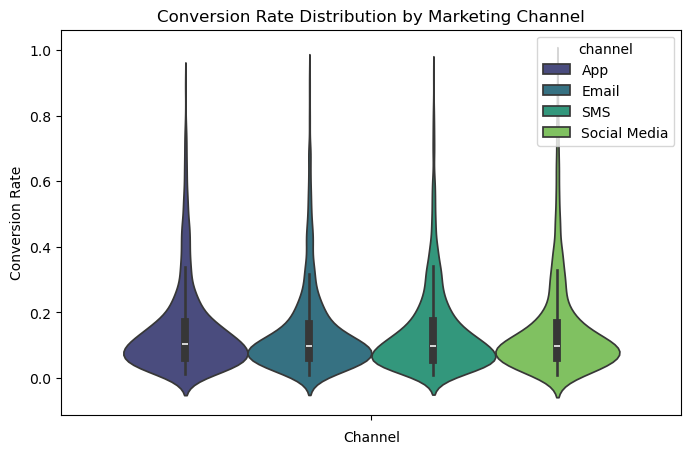

In [366]:
# visual for conversion rate across channels
plt.figure(figsize=(8, 5))
sns.violinplot(hue='channel', y='conversion_rate', data=mkt_df, palette='viridis')
plt.title('Conversion Rate Distribution by Marketing Channel')
plt.xlabel('Channel')
plt.ylabel('Conversion Rate')
plt.show()

Here I compare conversion rates across marketing channels, revealing where customers are most responsive. Converstion rate across marketing channels is flat.

In [289]:
# getting average conversion rate across campaign groups
conversion_by_campaign = mkt_df.groupby('campaign_name')['conversion_rate'].mean().sort_values(ascending=False).reset_index()
conversion_by_campaign

,campaign_name,conversion_rate
0,New User Discount,0.149326
1,Referral Program,0.148921
2,Weekend Special,0.147017
3,Category Promotion,0.145719
4,App Push Notification,0.144661
5,Festival Offer,0.139815
6,Flash Sale,0.138405
7,Email Campaign,0.133360
8,Membership Drive,0.131634


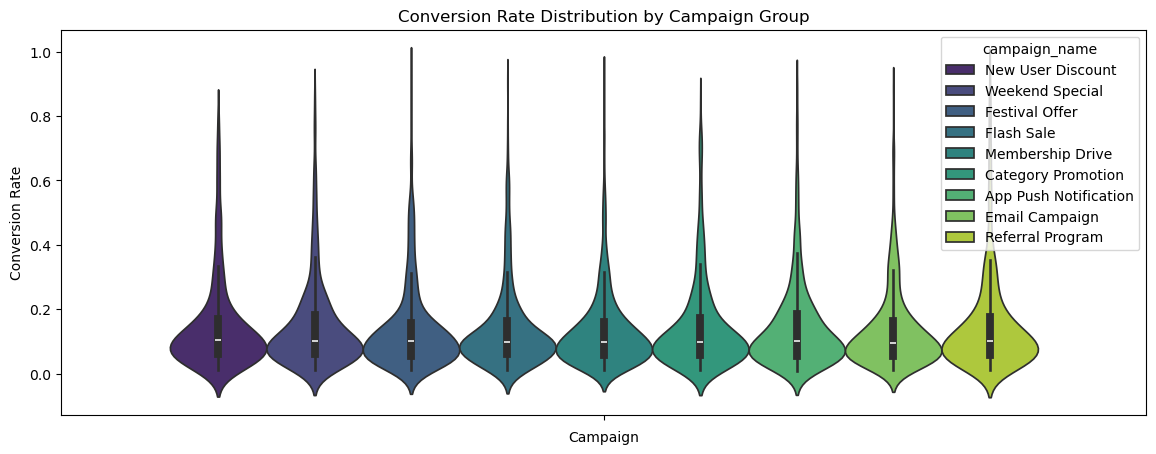

In [365]:
# visual for average conversion rate across campaign groups
plt.figure(figsize=(14, 5))
sns.violinplot(hue='campaign_name', y='conversion_rate', data=mkt_df, palette='viridis')
plt.title('Conversion Rate Distribution by Campaign Group')
plt.xlabel('Campaign')
plt.ylabel('Conversion Rate')
plt.show()

This summarizes conversion rate performance by campaign type, highlighting which strategies resonate best with customers. Conversion rate across Campaign groups is flat.

In [291]:
# getting average conversion rate across audience types
conversions_by_audience = mkt_df.groupby('target_audience')['conversion_rate'].mean().sort_values(ascending=False).reset_index()
conversions_by_audience

,target_audience,conversion_rate
0,New Users,0.145932
1,All,0.143187
2,Inactive,0.140622
3,Premium,0.138638


In [292]:
# calculating total revenue generated by each audience type
revenue_by_audience = mkt_df.groupby('target_audience')['revenue_generated_usd'].sum().sort_values(ascending=False).reset_index()
revenue_by_audience

,target_audience,revenue_generated_usd
0,New Users,97709.98656
1,Inactive,97269.49212
2,All,95743.65948
3,Premium,95597.75028


In [293]:
# calculating total spend for each target audience group
audience_spend= mkt_df.groupby('target_audience')['spend_usd'].sum().sort_values(ascending=False).reset_index()
audience_spend

,target_audience,spend_usd
0,All,49323.69120
1,New Users,48987.76044
2,Inactive,48927.31032
3,Premium,48599.29692


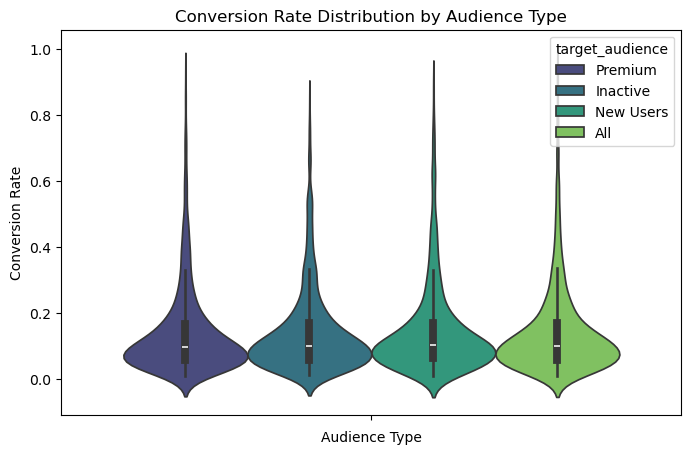

In [367]:
# creating visual for spread and outliers in conversion rates for different audience groups
plt.figure(figsize=(8, 5))
sns.violinplot(hue='target_audience', y='conversion_rate', data=mkt_df, palette='viridis')
plt.title('Conversion Rate Distribution by Audience Type')
plt.xlabel('Audience Type')
plt.ylabel('Conversion Rate')
plt.show()

This box plot highlights the distribution and variability of conversion rates across audience segments, helping identify high-performing groups and outliers. Conversion rate across audience groups is flat.

#### **Engagement Breakdown**

In [295]:
# calculating and storing engagment rate in new column
mkt_df['engagement_rate'] = mkt_df['clicks'] / mkt_df['impressions']

# calculating engagement by channel group
eng_by_channel = mkt_df.groupby('channel')['engagement_rate'].mean().sort_values(ascending=False).reset_index()
eng_by_channel

,channel,engagement_rate
0,Email,0.148540
1,SMS,0.142717
2,Social Media,0.139354
3,App,0.137087


/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_90449/2512514573.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mkt_df, x='channel', y='engagement_rate', palette='viridis')


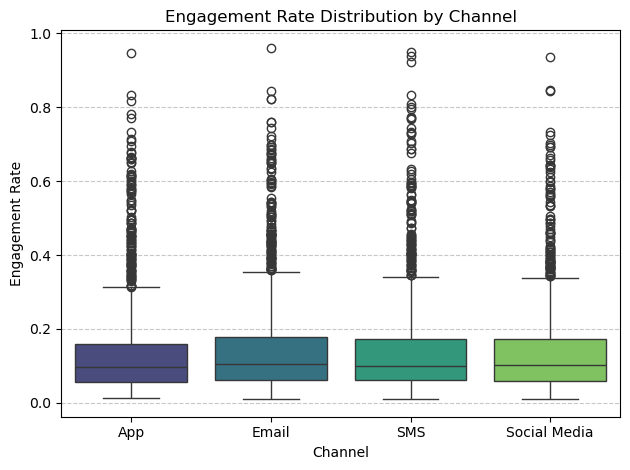

In [379]:
# creating visual for engagement rates across channels
sns.boxplot(data=mkt_df, x='channel', y='engagement_rate', palette='viridis')

plt.title('Engagement Rate Distribution by Channel')
plt.xlabel('Channel')
plt.ylabel('Engagement Rate')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Distribution appears even across channels, most engagement rates fall between 12-13%, with each channel having a handful of outliers where the engagement rates reached over 80%

In [296]:
# calculating engagement by campaign group
eng_by_campaign = mkt_df.groupby('campaign_name')['engagement_rate'].mean().sort_values(ascending=False).reset_index()
eng_by_campaign

,campaign_name,engagement_rate
0,App Push Notification,0.148472
1,Referral Program,0.144802
2,Membership Drive,0.142955
3,Email Campaign,0.142952
4,Flash Sale,0.141937
5,New User Discount,0.141411
6,Category Promotion,0.141250
7,Weekend Special,0.138375
8,Festival Offer,0.134911


/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_90449/3285246339.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mkt_df, x='campaign_name', y='engagement_rate', palette='viridis')


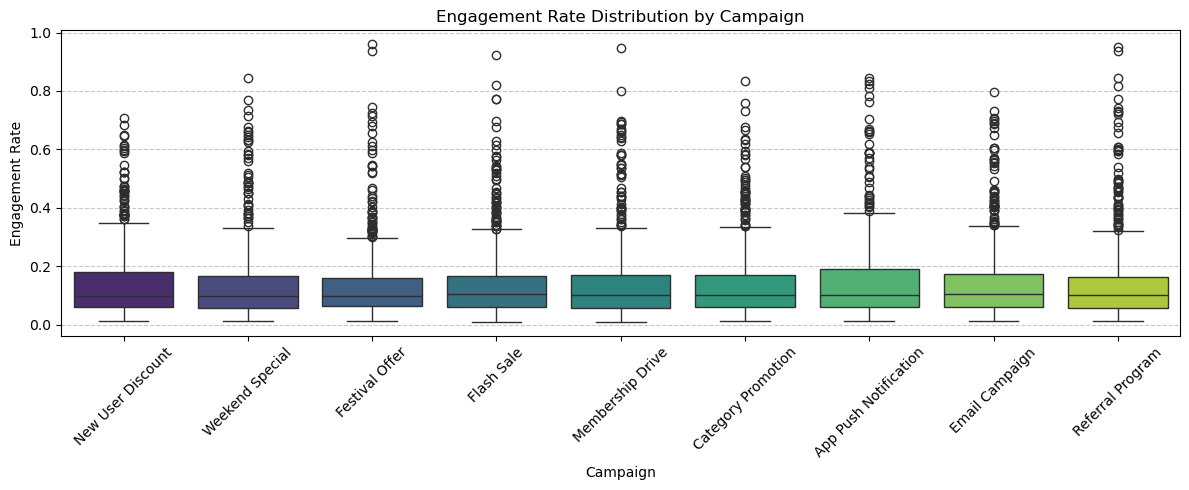

In [377]:
# creating visual for engagement rates across campaign groups
plt.figure(figsize=(12,5))
sns.boxplot(data=mkt_df, x='campaign_name', y='engagement_rate', palette='viridis')

plt.title('Engagement Rate Distribution by Campaign')
plt.xlabel('Campaign')
plt.ylabel('Engagement Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Similar to engagement across channels, engagement across campaign groups is realaltively even. The majority of campaigns have an engagement rate around ~12-17%, with App Push Notification campaigns having just a slightly higher typical rate taht is closer to 20%. Excluding New User Discounts, all campaign groups have a handful of outliers that neared or reached ~80% engagment or higher.

In [297]:
# calculating engagement by audience type
eng_by_audience = mkt_df.groupby('target_audience')['engagement_rate'].mean().sort_values(ascending=False).reset_index()
eng_by_audience

,target_audience,engagement_rate
0,Inactive,0.144011
1,All,0.142140
2,Premium,0.142115
3,New Users,0.139335


/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_90449/2207325678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mkt_df, x='target_audience', y='engagement_rate', palette='viridis')


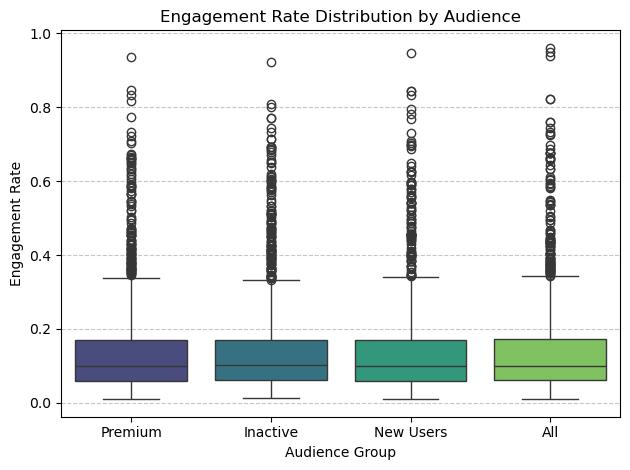

In [380]:
# creating visual for engagement rates across audience types
sns.boxplot(data=mkt_df, x='target_audience', y='engagement_rate', palette='viridis')

plt.title('Engagement Rate Distribution by Audience')
plt.xlabel('Audience Group')
plt.ylabel('Engagement Rate')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Engagement rates across audiences follows a similar pattern with most rates falling around the ~14-17% range. All audience groups have a few outliers where engagement rates surpassed 80%.

#### **Temporal Marketing Performance Breakdown**

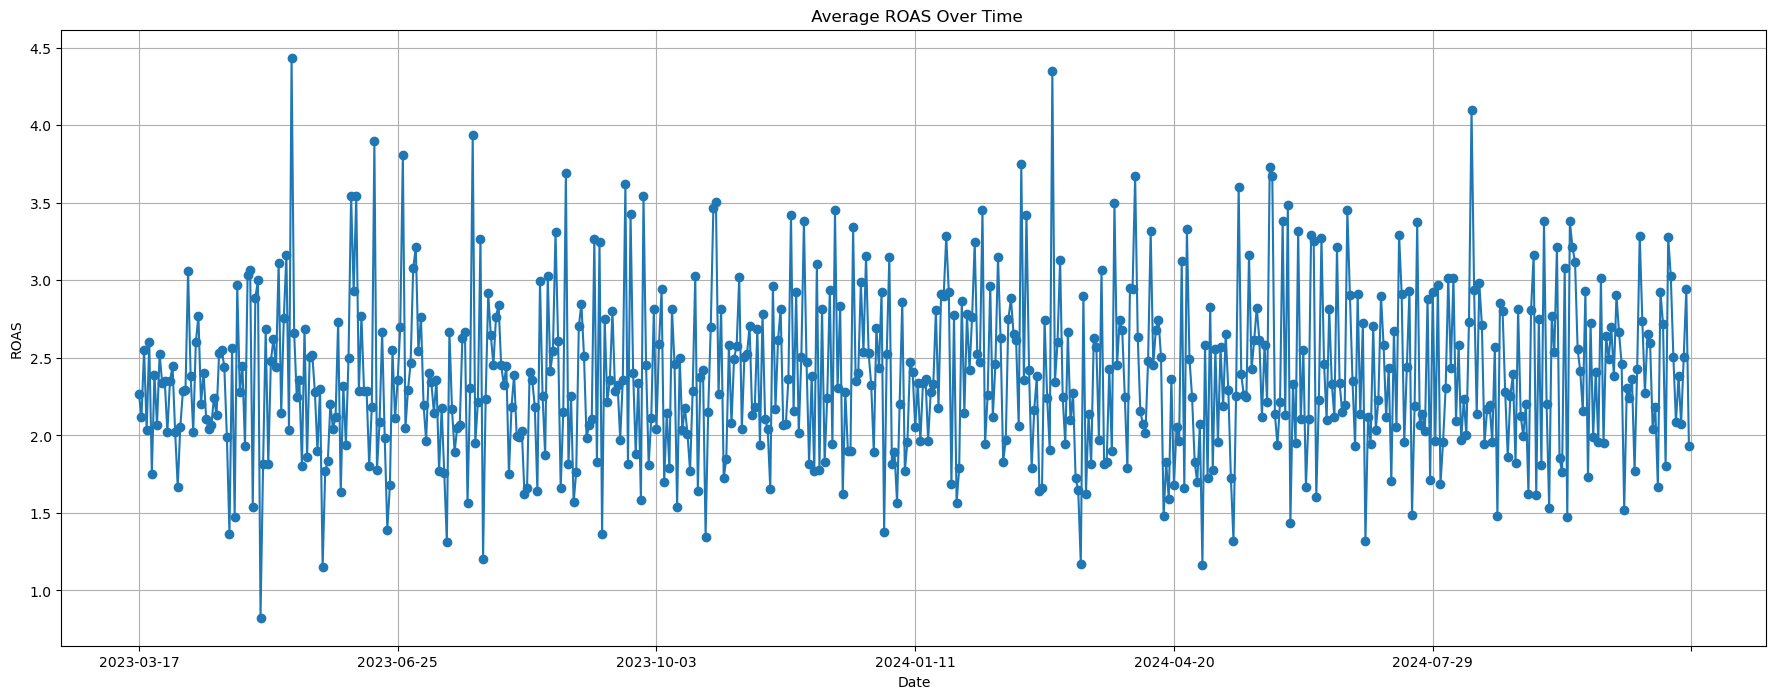

In [298]:
# creating visual for tracking average roas over time
daily_roas = mkt_df.groupby('date')['roas'].mean()

plt.figure(figsize=(22, 8))
daily_roas.plot(title=' Average ROAS Over Time', marker='o')
plt.xlabel('Date')
plt.ylabel('ROAS')
plt.grid(True)

This line plot tracks average ROAS over time, helping evaluate campaign efficiency trends and seasonality effects. There are some noticable peaks in April 2023, March 2024, and August 2024, as well as a decent dip in ROAS sometime in early April of 2023. Overall variation in daily ROAS has increased slightly since March of 2023, but for the most part ROAS follows a steady and even spread.

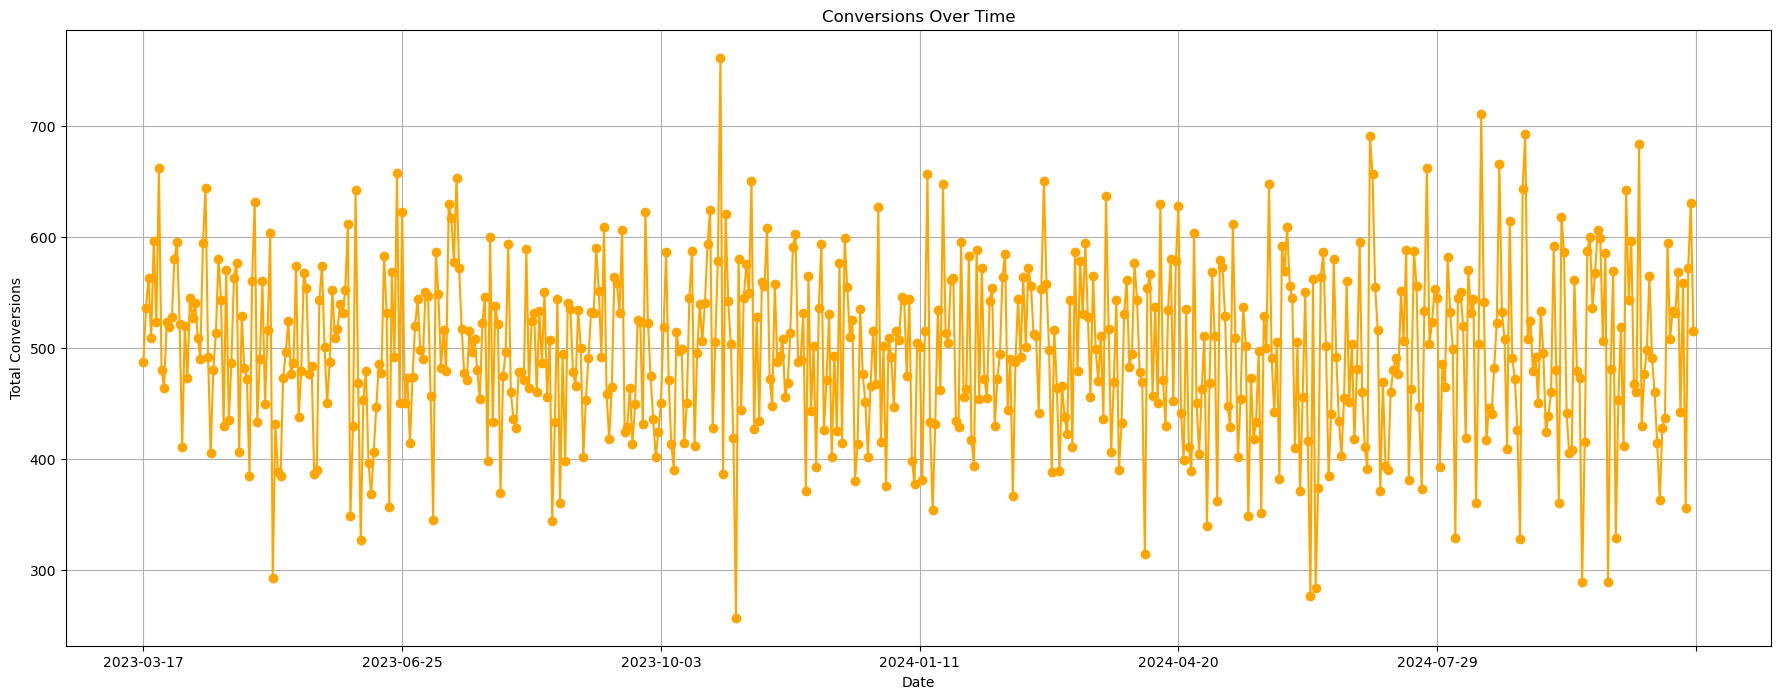

In [299]:
# getting total number of conversions by day
daily_conversions = mkt_df.groupby('date')['conversions'].sum()

plt.figure(figsize=(22, 8))
daily_conversions.plot(title='Conversions Over Time', marker='o', color='orange')
plt.xlabel('Date')
plt.ylabel('Total Conversions')
plt.grid(True)

This shows trends in conversions over time, helping to spot seasonal effects or spikes. Conversions had a noticable peak sometime in November of 2023. There is a dip in conversions around May and November of 2023. Much like ROAS, Variation in converisons has increased since March of 2023, with more frequent and noticeable peaks and dips in conversions appearing after March of 2024.

In [300]:
# getting total conversions by day of week
mkt_df['date'] = pd.to_datetime(mkt_df['date'])
mkt_df['day_of_week'] = mkt_df['date'].dt.day_name()

#sorted from most conversions to least
tot_conversions_by_day = mkt_df.groupby('day_of_week')['conversions'].sum().sort_values(ascending=False).reset_index()
tot_conversions_by_day

,day_of_week,conversions
0,Saturday,44829
1,Thursday,43186
2,Sunday,42796
3,Friday,42149
4,Monday,41933
5,Wednesday,41657
6,Tuesday,41488


In [301]:
# getting average conversions by day of week
avg_conversions_by_day = mkt_df.groupby('day_of_week')['conversions'].mean().sort_values(ascending=False).reset_index()
avg_conversions_by_day

,day_of_week,conversions
0,Saturday,57.918605
1,Thursday,56.452288
2,Sunday,55.291990
3,Friday,54.456072
4,Wednesday,54.453595
5,Monday,54.177003
6,Tuesday,53.602067


/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_90449/2599414757.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='conversions', data=tot_conversions_by_day, palette='viridis')


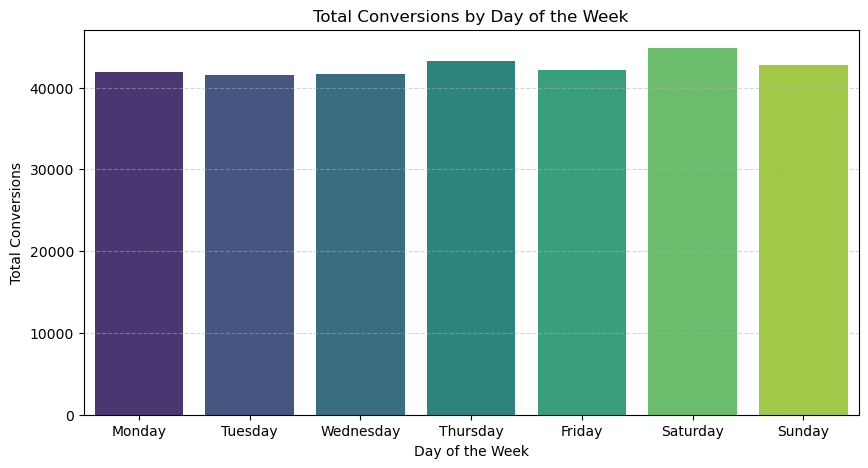

In [302]:
# visual for total conversions by day of week
tot_conversions_by_day = mkt_df.groupby('day_of_week')['conversions'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='day_of_week', y='conversions', data=tot_conversions_by_day, palette='viridis')

plt.title('Total Conversions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Conversions')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

This bar chart shows which days drive the highest number of conversions, helping optimize ad scheduling. The vairance in total conversions across all days is ~4, with Saturday having the highest total conversions and Tuesday having the least. Average conversions by day follows a similar pattern.

In [303]:
# calculating total engagement rate by day
mkt_df['date'] = pd.to_datetime(mkt_df['date'])
mkt_df['day_of_week'] = mkt_df['date'].dt.day_name()

# sorted from highest to lowest engagement
tot_eng_by_day = mkt_df.groupby('day_of_week')['engagement_rate'].sum().sort_values(ascending=False).reset_index()
tot_eng_by_day

,day_of_week,engagement_rate
0,Saturday,113.817965
1,Wednesday,113.264788
2,Tuesday,109.417170
3,Sunday,108.944096
4,Monday,107.874822
5,Friday,106.890851
6,Thursday,106.029676


In [304]:
# calculating average engagement rate by day, sorted
avg_eng_by_day = mkt_df.groupby('day_of_week')['engagement_rate'].mean().sort_values(ascending=False).reset_index()
avg_eng_by_day

,day_of_week,engagement_rate
0,Wednesday,0.148059
1,Saturday,0.147052
2,Tuesday,0.141366
3,Sunday,0.140755
4,Monday,0.139373
5,Thursday,0.138601
6,Friday,0.138102


/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_90449/2103814702.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='engagement_rate', data=eng_by_day, palette='viridis')


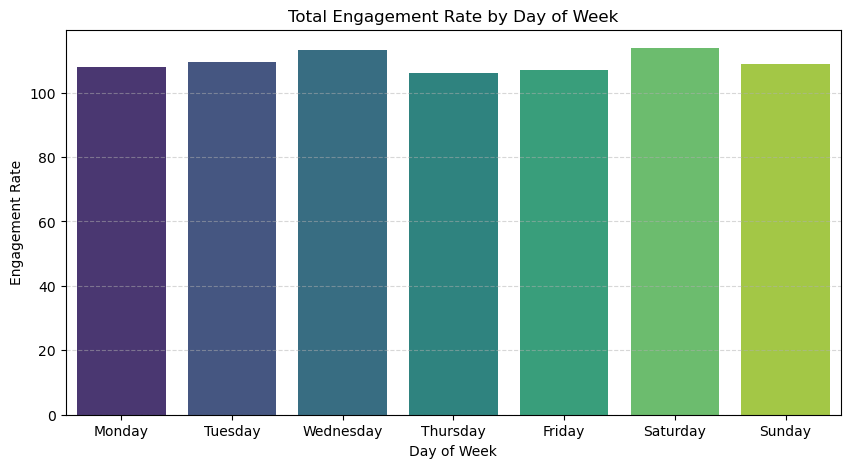

In [305]:
# visual for total engagement by day of week
eng_by_day = mkt_df.groupby('day_of_week')['engagement_rate'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='day_of_week', y='engagement_rate', data=eng_by_day, palette='viridis')

plt.title('Total Engagement Rate by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Engagement Rate')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Engagement volume by weekday is visualized here to identify peak activity days for targeting customers. For average and total engagement, Wednesday and saturday led the pack, though average and total engagment across all days holds little variance.

In [306]:
# calculating total revenue generated by day
mkt_df['date'] = pd.to_datetime(mkt_df['date'])
mkt_df['day_of_week'] = mkt_df['date'].dt.day_name()

tot_revenue_by_day = mkt_df.groupby('day_of_week')['revenue_generated_usd'].sum().sort_values(ascending=False).reset_index()
tot_revenue_by_day

,day_of_week,revenue_generated_usd
0,Monday,56271.27120
1,Saturday,56051.56332
2,Friday,55761.44544
3,Tuesday,54992.15412
4,Sunday,54566.80824
5,Thursday,54505.16268
6,Wednesday,54172.48344


In [307]:
# getting average revenue generated by day
avg_revenue_by_day = mkt_df.groupby('day_of_week')['revenue_generated_usd'].mean().sort_values(ascending=False).reset_index()
avg_revenue_by_day

,day_of_week,revenue_generated_usd
0,Monday,72.701901
1,Saturday,72.418040
2,Friday,72.043211
3,Thursday,71.248579
4,Tuesday,71.049295
5,Wednesday,70.813704
6,Sunday,70.499752


/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_90449/2308136132.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='revenue_generated_usd', data=rev_by_day, palette='viridis')


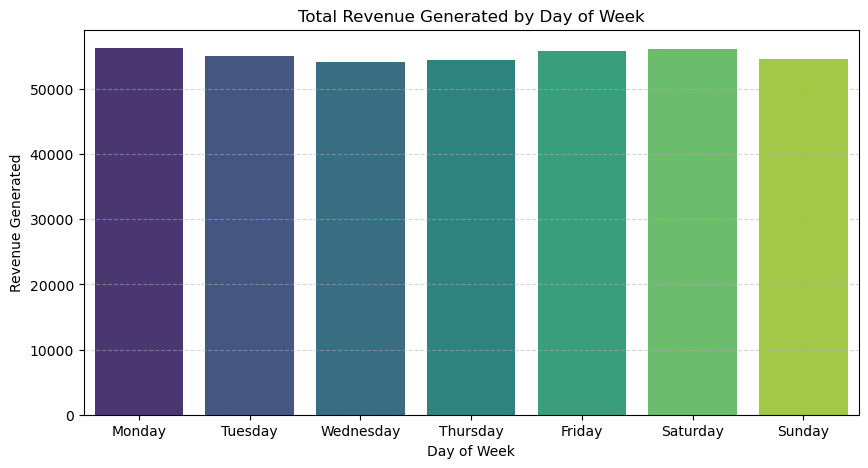

In [308]:
# visual for total revenue generated by day
rev_by_day = mkt_df.groupby('day_of_week')['revenue_generated_usd'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='day_of_week', y='revenue_generated_usd', data=rev_by_day, palette='viridis')

plt.title('Total Revenue Generated by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Revenue Generated')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

This chart highlights which days generate the most revenue, which may align with promotion cycles or customer habits. Monday and Saturday have the highest total and average revenue generated, but there is little variance across all days.

In [309]:
# getting average roas and conversion rate by day of week
performance_by_day = mkt_df.groupby('day_of_week')[['roas', 'conversion_rate']].mean().sort_values(by='roas', ascending=False).reset_index()
performance_by_day

,day_of_week,roas,conversion_rate
0,Monday,2.474444,0.142966
1,Saturday,2.429780,0.149593
2,Tuesday,2.399173,0.137071
3,Wednesday,2.382850,0.131965
4,Friday,2.377377,0.146200
5,Thursday,2.335098,0.140848
6,Sunday,2.258501,0.145891


Based on this, marketing performance across all days is similar. Though slightly, Monday and Saturday appear to be ideal days for running marketing campagins.

#### **Click-through Rate (CTR) Breakdown**

Click-Through Rate (CTR) is a key performance metric that measures the percentage of users who clicked on a marketing asset after viewing it. This section explores CTR across different marketing channels, campaign groups, and audience types to identify patterns in engagement. By analyzing both average CTR and its distribution, we can uncover which segments are driving the most effective engagement and where performance may be inconsistent or under-optimized.

In [310]:
# calculating and storing Click-Through Rate (CTR)
mkt_df['ctr'] = mkt_df['clicks'] / mkt_df['impressions']

In [311]:
# getting average CTR by channel, sorted
ctr_by_channel = mkt_df.groupby('channel')['ctr'].mean().sort_values(ascending=False).reset_index()
ctr_by_channel

,channel,ctr
0,Email,0.148540
1,SMS,0.142717
2,Social Media,0.139354
3,App,0.137087


/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_90449/3718895324.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mkt_df, x='channel', y='ctr', palette='viridis')


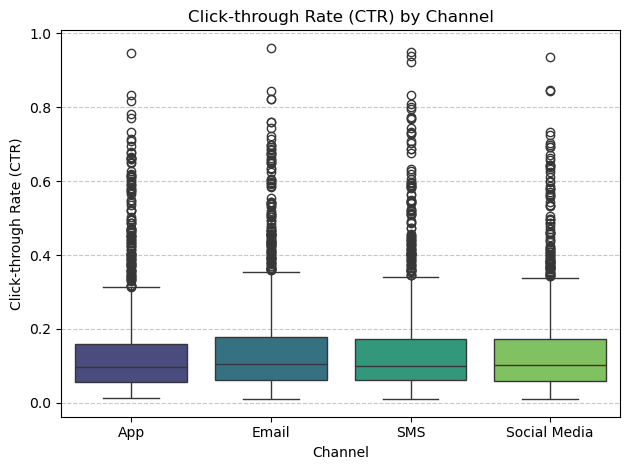

In [386]:
# visual for ctr distribution across channels
sns.boxplot(data=mkt_df, x='channel', y='ctr', palette='viridis')

plt.title('Click-through Rate (CTR) by Channel')
plt.xlabel('Channel')
plt.ylabel('Click-through Rate (CTR)')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This plot compares Click-Through Rate (CTR) performance across different marketing channels. CTR across channels is flat. Most CTRs fall between ~7-18%.

In [313]:
# getting average CTR by campaign group, sorted
ctr_by_campaign = mkt_df.groupby('campaign_name')['ctr'].mean().sort_values(ascending=False).reset_index()
ctr_by_campaign

,campaign_name,ctr
0,App Push Notification,0.148472
1,Referral Program,0.144802
2,Membership Drive,0.142955
3,Email Campaign,0.142952
4,Flash Sale,0.141937
5,New User Discount,0.141411
6,Category Promotion,0.141250
7,Weekend Special,0.138375
8,Festival Offer,0.134911


/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_90449/2780028548.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mkt_df, x='campaign_name', y='ctr', palette='viridis')


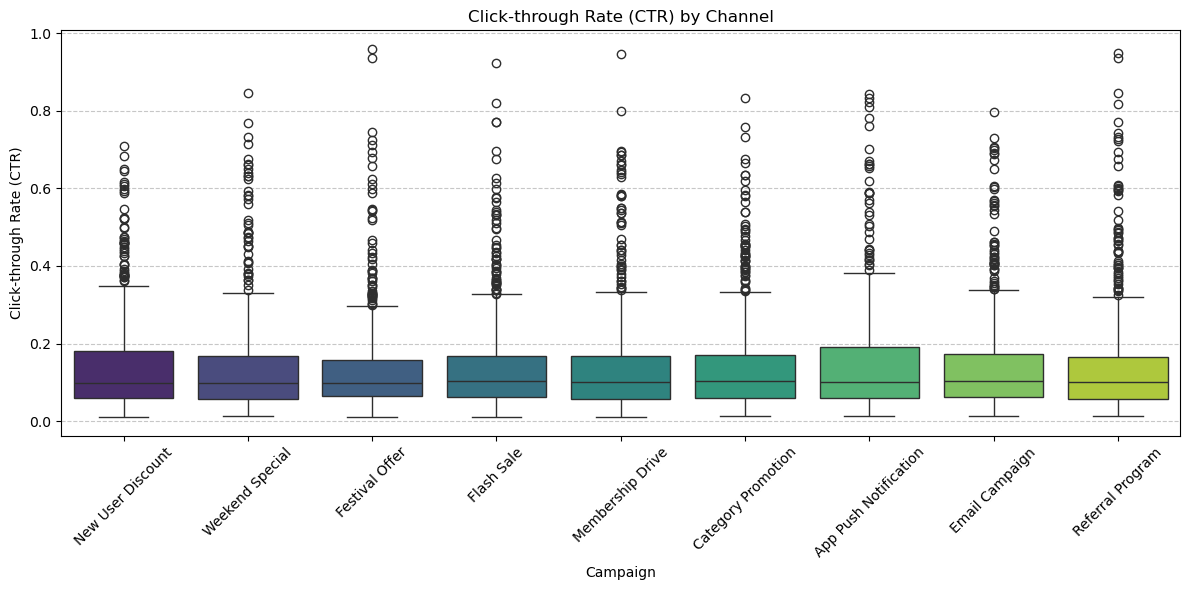

In [391]:
# visual for ctr distribution across campaign groups
plt.figure(figsize=(12,6))
sns.boxplot(data=mkt_df, x='campaign_name', y='ctr', palette='viridis')

plt.title('Click-through Rate (CTR) by Channel')
plt.xlabel('Campaign')
plt.ylabel('Click-through Rate (CTR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This plot helps evaluate how campaign types differ in their ability to drive user clicks (CTR). CTR across campaign groups is flat, most rates fall between ~7-18%, with App Push Notifications having a slightly higher typical CTR.

In [315]:
# getting average CTR by audience type, sorted
ctr_by_audience = mkt_df.groupby('target_audience')['ctr'].mean().sort_values(ascending=False).reset_index()
ctr_by_audience

,target_audience,ctr
0,Inactive,0.144011
1,All,0.142140
2,Premium,0.142115
3,New Users,0.139335


/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_90449/3973315536.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mkt_df, x='target_audience', y='ctr', palette='viridis')


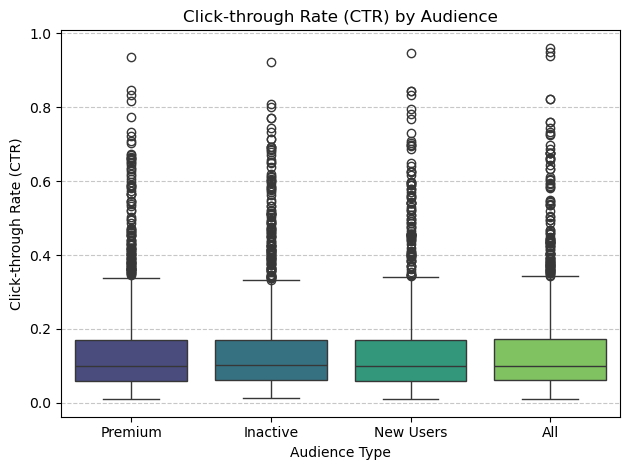

In [392]:
# visual for ctr distribution across channels
sns.boxplot(data=mkt_df, x='target_audience', y='ctr', palette='viridis')

plt.title('Click-through Rate (CTR) by Audience')
plt.xlabel('Audience Type')
plt.ylabel('Click-through Rate (CTR)')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This chart shows how well different audience segments respond to ads, measured by average CTR. CTR across audience types is flat with CTRs falling between ~7-18%.

## **File 5: Blinkit Inventory**

This section analyzes Blinkit's inventory data to understand stock flow and product handling over time. By examining trends in stock intake and damage rates, I aim to identify any operational inefficiencies, potential supply chain issues, and opportunities to improve inventory management practices.


In [317]:
inventory_df = pd.read_csv('/Users/tovi/Desktop/Projects/Blinket-Sales/csv_files/blinkit_inventory.csv')
inventory_df

,product_id,date,stock_received,damaged_stock
0,153019,2023-03-01,4,1
1,848226,2023-03-01,4,1
2,965755,2023-03-01,1,0
3,39154,2023-03-01,4,0
4,34186,2023-03-01,3,1
...,...,...,...,...
18100,837480,2024-11-01,3,0
18101,56589,2024-11-01,3,0
18102,679284,2024-11-01,3,0
18103,673058,2024-11-01,3,0


In [318]:
inventory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18105 entries, 0 to 18104
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      18105 non-null  int64 
 1   date            18105 non-null  object
 2   stock_received  18105 non-null  int64 
 3   damaged_stock   18105 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 565.9+ KB


In [401]:
# getting the number of products
product_count=inventory_df['product_id'].nunique()
product_count

268

In [319]:
inventory_df.shape

(18105, 4)

In [320]:
inventory_df.isnull().sum()

product_id        0
date              0
stock_received    0
damaged_stock     0
dtype: int64

In [321]:
# converting to datetime format
inventory_df['date'] = pd.to_datetime(inventory_df['date'])

# saving new csv to replace the original that had formats incompatible with my SQL analysis
inventory_df.to_csv('blinkit_inventory_new.csv', index=False)

# tracking stock received over time
daily_stock = inventory_df.groupby('date')['stock_received'].sum()

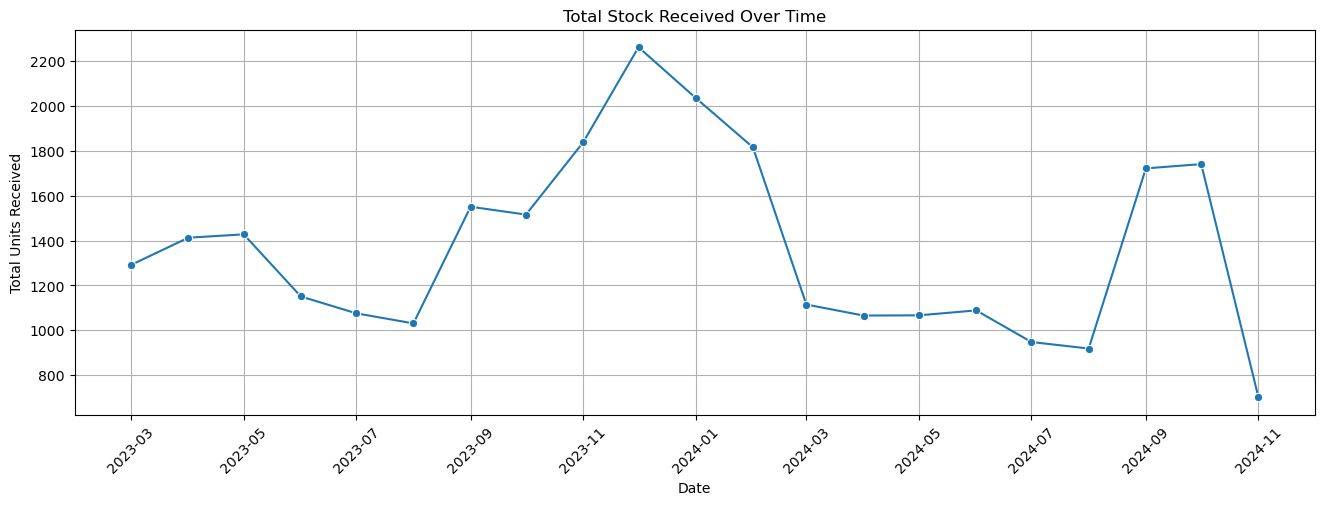

In [395]:
# creating visual for stock received over time
plt.figure(figsize=(16, 5))
sns.lineplot(x=daily_stock.index, y=daily_stock.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Total Units Received')
plt.title('Total Stock Received Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

This line plot tracks how much stock is received over time, helping detect restocking patterns or inconsistencies. Stock reception surged between November 2023-February 2024, peaking around December of 2024. This could be due to the holiday season where overall demand for products typically increases. This was followed by a sharp drop where stock intake levels out until August of 2024. This could be due to lower forecasted damand, or a correction for a possible surplus of stock from the previous months. Intake peaks again through October of 2024 before sharply dropping again in November of 2024. At a glance, this chart suggests that inventory strateigies could be reactive instead of proactive.

In [323]:
# getting total stock received and damaged stock received by month
monthly_data = inventory_df.groupby('date')[['stock_received', 'damaged_stock']].sum()
print(monthly_data)

            stock_received  damaged_stock
date                                     
2023-03-01            1292             17
2023-04-01            1413              0
2023-05-01            1428             31
2023-06-01            1151            191
2023-07-01            1076             25
2023-08-01            1031            252
2023-09-01            1551              0
2023-10-01            1516            291
2023-11-01            1838             36
2023-12-01            2262              0
2024-01-01            2036             85
2024-02-01            1816              0
2024-03-01            1115             16
2024-04-01            1066             42
2024-05-01            1067             64
2024-06-01            1089             44
2024-07-01             948              0
2024-08-01             919             13
2024-09-01            1722              2
2024-10-01            1741              0
2024-11-01             702              0


In [324]:
# getting daily rates of damaged stock and storing in new column
inventory_df['dmg_stock_rate'] = inventory_df['damaged_stock'] / inventory_df['stock_received']
inventory_df.head()

,product_id,date,stock_received,damaged_stock,dmg_stock_rate
0,153019,2023-03-01,4,1,0.250000
1,848226,2023-03-01,4,1,0.250000
2,965755,2023-03-01,1,0,0.000000
3,39154,2023-03-01,4,0,0.000000
4,34186,2023-03-01,3,1,0.333333


In [325]:
# getting monthly rates for damaged stock and storing in new column
monthly_data['dmg_stock_rate'] = monthly_data['damaged_stock'] / monthly_data['stock_received']

# which months received the most damaged stock
dmg_months = monthly_data['dmg_stock_rate'].sort_values(ascending=False)
print(dmg_months)

date
2023-08-01    0.244423
2023-10-01    0.191953
2023-06-01    0.165943
2024-05-01    0.059981
2024-01-01    0.041749
2024-06-01    0.040404
2024-04-01    0.039400
2023-07-01    0.023234
2023-05-01    0.021709
2023-11-01    0.019587
2024-03-01    0.014350
2024-08-01    0.014146
2023-03-01    0.013158
2024-09-01    0.001161
2024-02-01    0.000000
2023-04-01    0.000000
2023-12-01    0.000000
2024-07-01    0.000000
2023-09-01    0.000000
2024-10-01    0.000000
2024-11-01    0.000000
Name: dmg_stock_rate, dtype: float64


In [326]:
# getting products with most damaged stock received
damage_ratio = inventory_df.groupby('product_id')[['stock_received', 'damaged_stock']].sum()
damage_ratio['damage_percent'] = (damage_ratio['damaged_stock'] / damage_ratio['stock_received']) * 100
damage_ratio = damage_ratio.sort_values('damage_percent', ascending=False)
print(damage_ratio.head(10))

            stock_received  damaged_stock  damage_percent
product_id                                               
124290                 106             13       12.264151
317242                 113             11        9.734513
661577                 126             12        9.523810
897083                  84              8        9.523810
398340                  99              9        9.090909
697683                  79              7        8.860759
91670                  104              9        8.653846
647462                  93              8        8.602151
767398                  84              7        8.333333
433521                 103              8        7.766990


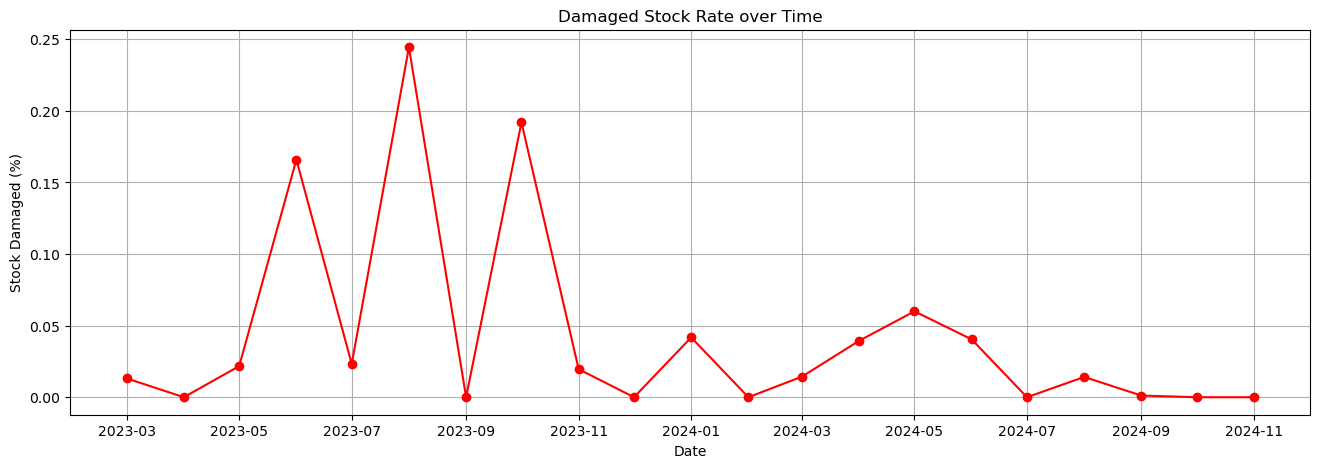

In [393]:
# visual for damgaged stock rate over time
plt.figure(figsize=(16,5))
plt.plot(monthly_data.index, monthly_data['dmg_stock_rate'], marker='o', color='red')
plt.title('Damaged Stock Rate over Time')
plt.ylabel('Stock Damaged (%)')
plt.xlabel('Date')
plt.grid(True)
plt.show()

This plot monitors the proportion of damaged stock over time to assess supply chain or warehouse handling issues. There are sharp increases in percentages of damaged stock received in June 2023, August, and October of 2023, with a less dramaric uptick in damaged stock occuring again in May of 2024. The supplier(s) may have had inventory or manufacturing issues during these months, or handling and product transport issues could be responsible. Another possibility is that certain categories of fragile items may have been received during these times. Stock received and damage rates at the product category level will be explored using SQL, and the findings of that analysis will be included in the final report.

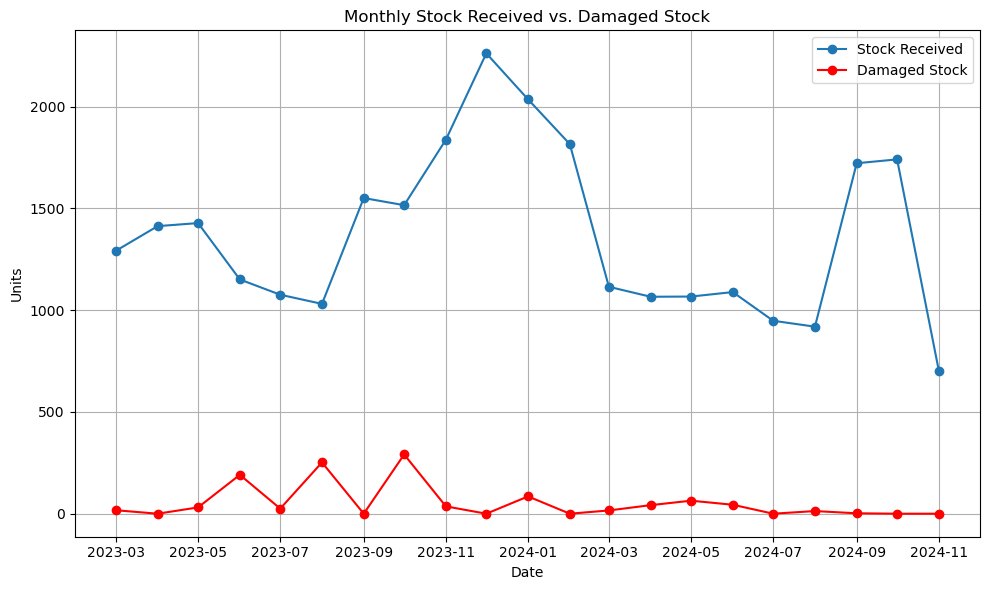

In [328]:
# visual for total stock received vs damaged stock over time
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['stock_received'], label='Stock Received', marker='o')
plt.plot(monthly_data.index, monthly_data['damaged_stock'], label='Damaged Stock', marker='o', color='red')

plt.title('Monthly Stock Received vs. Damaged Stock')
plt.xlabel('Date')
plt.ylabel('Units')
plt.legend()
plt.grid(True)
plt.tight_layout()

# save to images folder
plt.savefig('images/monthly_stock.png')
plt.show()

This dual-line plot compares total stock received with damaged stock to identify problematic periods or trends. In comparing damaged stock trends to the overall stock received, the peaks in damaged stock can not be completely explained by an overall surge in stock. Contacting suppliers for the product recieved over this time and investigating shipping and handling processes could provide an explanation for these peaks.

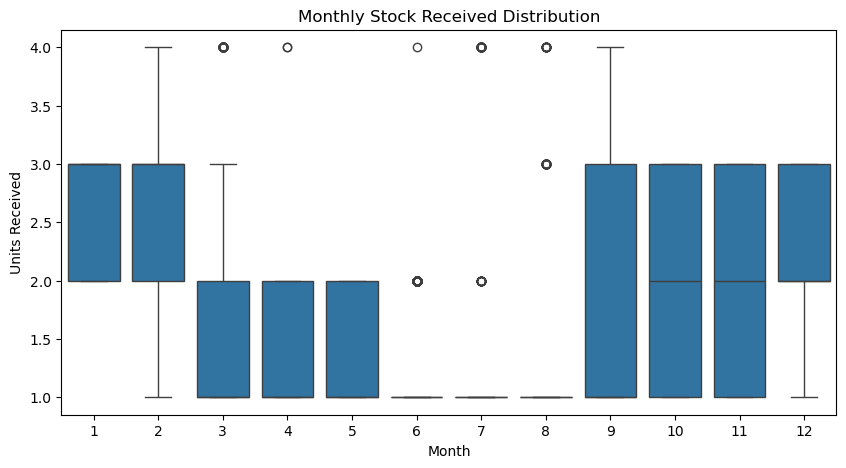

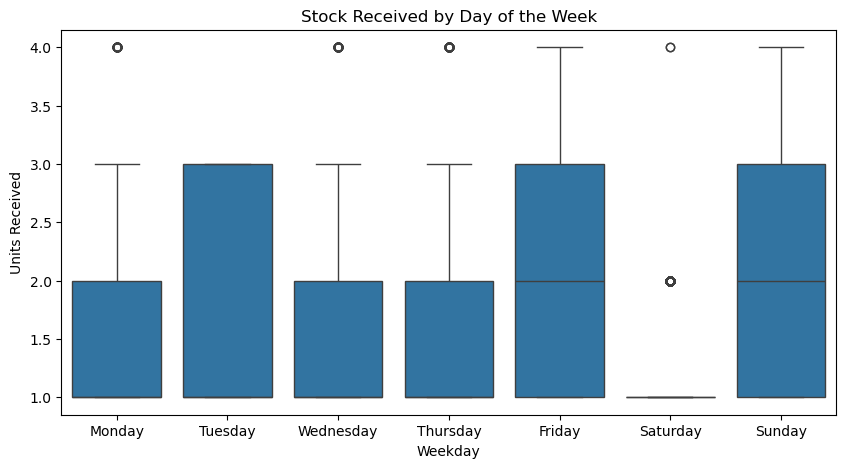

In [397]:
# get month and weekday
inventory_df['month'] = inventory_df['date'].dt.month
inventory_df['weekday'] = inventory_df  ['date'].dt.day_name()

# create visual to show distribution of stock received by month per restocking event
plt.figure(figsize=(10, 5))
sns.boxplot(x=inventory_df['month'], y=inventory_df['stock_received'])
plt.xlabel('Month')
plt.ylabel('Units Received')
plt.title('Monthly Stock Received Distribution')
plt.show()

# create visual to show distribution of stock received by week per restocking event
plt.figure(figsize=(10, 5))
sns.boxplot(x=inventory_df['weekday'], y=inventory_df['stock_received'], order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Weekday')
plt.ylabel('Units Received')
plt.title('Stock Received by Day of the Week')
plt.show()

These plots displays a monthly and daily breakdown of the distribution of stock received per product, per restock event. At the month level, January and February show more vairation and higher restock volume. Very little stock and variation can be seen during the summer months (June-August). Most stock is recieved in the later quarter of the year (September-Decemeber), this could be due to higher demand caused by the season or holidays, or planned stockpiling.

At the weekly level, ,median restock levels are fairly uniform Monday–Friday. Friday and Sunday show the highest upper whiskers, indicating more frequent high-volume events. Saturday has the lowest median and appears underutilized.


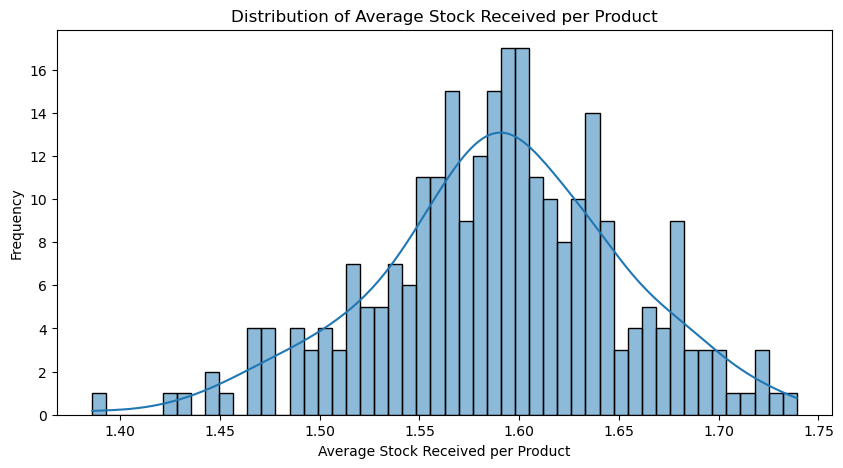

In [331]:
# getting average stock received per product
avg_stock_per_product = inventory_df.groupby('product_id')['stock_received'].mean()

# visual for distribution of avg stock received per product
plt.figure(figsize=(10, 5))
sns.histplot(avg_stock_per_product, bins=50, kde=True)
plt.xlabel('Average Stock Received per Product')
plt.ylabel('Frequency')
plt.title('Distribution of Average Stock Received per Product')
plt.show()

Another look at per-product stock distribution to identify outliers or understocked items. This histogram shows a relatively normal distribution, with an average of 1.6 units received per product.

## **File 6: Blinkit Customers**

This section explores customer-level data to uncover trends in registration behavior, purchase frequency, and average spending. Here, I will to identify high-value customer segments, examine acquisition patterns over time, and surface opportunities to improve retention and engagement.

In [332]:
cust_df = pd.read_csv('/Users/tovi/Desktop/Projects/Blinket-Sales/csv_files/blinkit_customers.csv')
cust_df

,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value
0,97475543,Niharika Nagi,ektataneja@example.org,912987579691,"23, Nayar Path, Bihar Sharif-154625",Udupi,321865,2023-05-13,Premium,13,451.92
1,22077605,Megha Sachar,vedant45@example.com,915123179717,"51/302, Buch Chowk\nSrinagar-570271",Aligarh,149394,2024-06-18,Inactive,4,825.48
2,47822591,Hema Bahri,samiazaan@example.com,910034076149,"941\nAnne Street, Darbhanga 186125",Begusarai,621411,2024-09-25,Regular,17,1969.81
3,79726146,Zaitra Vig,ishanvi87@example.org,916264232390,"43/94, Ghosh, Alappuzha 635655",Kozhikode,826054,2023-10-04,New,4,220.09
4,57102800,Januja Verma,atideshpande@example.org,917293526596,"06\nOm, Ambarnath 477463",Ichalkaranji,730539,2024-03-22,Inactive,14,578.14
...,...,...,...,...,...,...,...,...,...,...,...
2495,48002829,Daksh Mandal,varkeymohammed@example.com,919587731286,"28/42, Venkataraman Ganj, Kishanganj-360157",Mumbai,45238,2024-01-25,Inactive,17,754.33
2496,57392064,Lavanya Jain,deshpandeom@example.com,916137420258,"391, Edwin Path, Korba 202726",Udupi,688100,2024-06-23,Regular,4,1540.81
2497,71688530,Umang Dash,gokhalenicholas@example.org,917595275963,"151, Parmer Ganj\nLoni 906431",Kavali,528749,2024-03-18,Regular,1,1541.22
2498,89051578,Zinal Natarajan,vyasfrado@example.com,911994009448,"H.No. 172, Khanna Street, Pudukkottai 610564",Alwar,586734,2024-09-06,Premium,12,1185.50


In [333]:
# converting registration date to datetime format
cust_df['registration_date'] = pd.to_datetime(cust_df['registration_date'])

In [334]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        2500 non-null   int64         
 1   customer_name      2500 non-null   object        
 2   email              2500 non-null   object        
 3   phone              2500 non-null   int64         
 4   address            2500 non-null   object        
 5   area               2500 non-null   object        
 6   pincode            2500 non-null   int64         
 7   registration_date  2500 non-null   datetime64[ns]
 8   customer_segment   2500 non-null   object        
 9   total_orders       2500 non-null   int64         
 10  avg_order_value    2500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 215.0+ KB


In [335]:
# keeping desired columns, drop cols with sensitive info
drop_cols=['customer_name', 'email', 'phone', 'address', 'pincode']
cust_df = cust_df.drop(columns=drop_cols)
cust_df


,customer_id,area,registration_date,customer_segment,total_orders,avg_order_value
0,97475543,Udupi,2023-05-13,Premium,13,451.92
1,22077605,Aligarh,2024-06-18,Inactive,4,825.48
2,47822591,Begusarai,2024-09-25,Regular,17,1969.81
3,79726146,Kozhikode,2023-10-04,New,4,220.09
4,57102800,Ichalkaranji,2024-03-22,Inactive,14,578.14
...,...,...,...,...,...,...
2495,48002829,Mumbai,2024-01-25,Inactive,17,754.33
2496,57392064,Udupi,2024-06-23,Regular,4,1540.81
2497,71688530,Kavali,2024-03-18,Regular,1,1541.22
2498,89051578,Alwar,2024-09-06,Premium,12,1185.50


In [336]:
# converting avg_order_value to USD and storing in new column
cust_df['avg_order_value_usd'] = cust_df['avg_order_value'] * exchange_rate
cust_df.head(5)

,customer_id,area,registration_date,customer_segment,total_orders,avg_order_value,avg_order_value_usd
0,97475543,Udupi,2023-05-13,Premium,13,451.92,5.42304
1,22077605,Aligarh,2024-06-18,Inactive,4,825.48,9.90576
2,47822591,Begusarai,2024-09-25,Regular,17,1969.81,23.63772
3,79726146,Kozhikode,2023-10-04,New,4,220.09,2.64108
4,57102800,Ichalkaranji,2024-03-22,Inactive,14,578.14,6.93768


In [337]:
cust_df[['total_orders','avg_order_value_usd']].describe()

,total_orders,avg_order_value_usd
count,2500.000000,2500.000000
mean,10.491600,13.228510
std,5.805533,6.276518
min,1.000000,2.405160
25%,6.000000,7.581810
50%,10.000000,13.423800
75%,16.000000,18.784800
max,20.000000,23.997960


#### **Customer Breakdown**

In [338]:
segment_summary = cust_df.groupby('customer_segment').agg({
    'avg_order_value_usd': 'mean',
    'total_orders': 'mean',
    'customer_id': 'count'
}).rename(columns={'customer_id': 'num_customers'}).reset_index()

print(segment_summary)

  customer_segment  avg_order_value_usd  total_orders  num_customers
0         Inactive            13.225800     10.583333            600
1              New            13.399627     10.874204            628
2          Premium            13.217688     10.192733            633
3          Regular            13.073605     10.325509            639


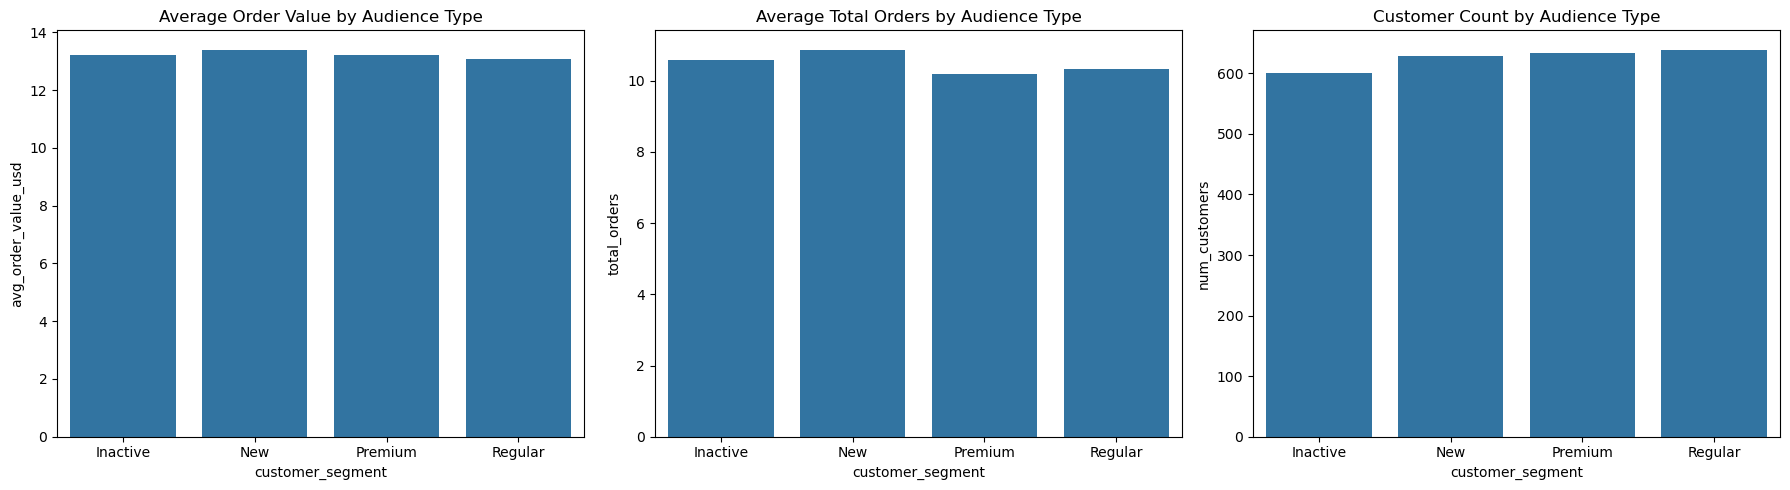

In [339]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x='customer_segment', y='avg_order_value_usd', data=segment_summary, ax=axs[0])
axs[0].set_title('Average Order Value by Audience Type')

sns.barplot(x='customer_segment', y='total_orders', data=segment_summary, ax=axs[1])
axs[1].set_title('Average Total Orders by Audience Type')

sns.barplot(x='customer_segment', y='num_customers', data=segment_summary, ax=axs[2])
axs[2].set_title('Customer Count by Audience Type')

plt.tight_layout()
plt.show()

These grouped bar charts compare audience segments by averge order value, total orders, and customer volume, helping identify any performance differences amongst these audience groups. Order value, total orders, and customer count by audience type is flat. This could mean that the way cusotmer segments are divided currently is not a good representation of each category, and the logic behind forming these categories is too shallow. Marketing targeting may not be effective across audience types unless the segments are differenciated better. Investigate criteria for each category and explore ways to redefine or create new subsets of audiences.


In [340]:
# identify high value customers for targeting
high_value = cust_df[
    (cust_df['avg_order_value_usd'] > cust_df['avg_order_value_usd'].quantile(0.90)) &
    (cust_df['total_orders'] > cust_df['total_orders'].quantile(0.90))
]

print('High-Value Customers:')
print(high_value[['customer_id', 'avg_order_value_usd', 'total_orders', 'customer_segment']])

High-Value Customers:
      customer_id  avg_order_value_usd  total_orders customer_segment
205      25221501             23.23008            20          Regular
385      35237846             23.62380            20          Premium
673       3893903             23.07252            20              New
980      82374625             23.08368            20              New
1237     93522848             22.50324            20         Inactive
1307     76971644             21.74724            20         Inactive
1349      1342184             22.72596            20         Inactive
1870     42366724             22.75524            20         Inactive
1989     49769532             23.08068            20          Premium
2001     90666073             23.63340            20         Inactive
2286     96109948             22.54956            20         Inactive
2339     24337950             22.14504            20         Inactive
2346     72415263             22.97016            20          Regula

#### **Area Breakdown**

In [341]:
area_summary = cust_df.groupby('area').agg({
    'avg_order_value_usd': 'mean',
    'customer_id': 'count'
}).rename(columns={'customer_id': 'num_customers'}).reset_index()

print(area_summary)

              area  avg_order_value_usd  num_customers
0            Adoni             9.557493              9
1         Agartala            11.037930              8
2             Agra            14.599464             10
3        Ahmedabad            11.153800              6
4       Ahmednagar             9.328280             12
..             ...                  ...            ...
311  Vijayanagaram            10.762056              5
312     Vijayawada            15.273765              8
313  Visakhapatnam            13.235171             11
314       Warangal            12.695907              9
315    Yamunanagar            13.349904             10

[316 rows x 3 columns]


In [342]:
# getting total number of regestered customers in each area
cust_in_areas = (cust_df.groupby('area')['customer_id'].nunique().reset_index(name='num_customers').sort_values(by='num_customers', ascending=False))
cust_in_areas

,area,num_customers
130,Jalna,18
80,Deoghar,17
34,Bathinda,17
218,Orai,17
248,Ratlam,16
...,...,...
61,Bokaro,3
128,Jalandhar,3
282,Surat,3
230,Phusro,2


In [343]:
# getting top 10 areas with most registered customers
top_areas = (cust_df.groupby('area')['customer_id'].nunique().sort_values(ascending=False).head(10).reset_index(name='num_customers'))

print('Top 10 Areas with Most Registered Customers:')
print(top_areas)

Top 10 Areas with Most Registered Customers:
          area  num_customers
0        Jalna             18
1      Deoghar             17
2     Bathinda             17
3         Orai             17
4       Ratlam             16
5    Ghaziabad             16
6   Kishanganj             15
7  Gandhinagar             14
8      Nandyal             14
9       Kadapa             14


In [344]:
# getting area with the lowest number of registered customers
top_area = cust_df['area'].value_counts().idxmin()
print(f'Area with the fewest customers: {top_area}')

Area with the fewest customers: Mangalore


In [345]:
# calculating average order value per area
area_avg_order_value = cust_df.groupby('area')['avg_order_value'].mean()
print('Average Order Value per Area:\n', area_avg_order_value)

Average Order Value per Area:
 area
Adoni             796.457778
Agartala          919.827500
Agra             1216.622000
Ahmedabad         929.483333
Ahmednagar        777.356667
                    ...     
Vijayanagaram     896.838000
Vijayawada       1272.813750
Visakhapatnam    1102.930909
Warangal         1057.992222
Yamunanagar      1112.492000
Name: avg_order_value, Length: 316, dtype: float64


#### **Registration**

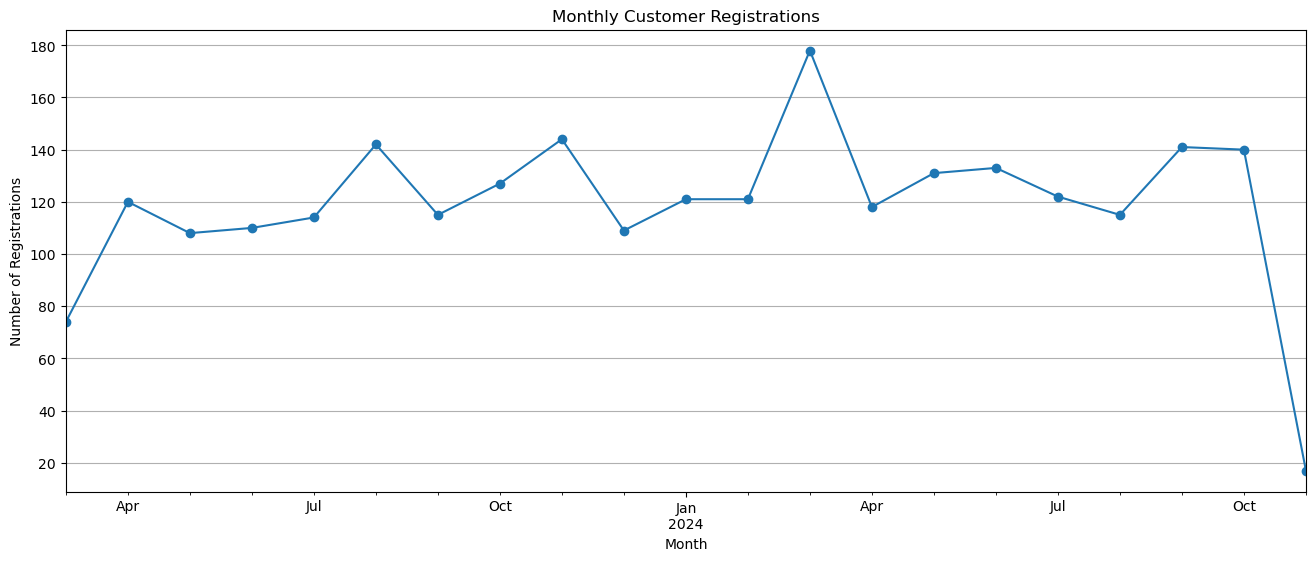

In [346]:
#  getting monthly customer registrations
cust_df['registration_month'] = cust_df['registration_date'].dt.to_period('M')
monthly_registrations = cust_df['registration_month'].value_counts().sort_index()

# creating visual for number of monthly customer registrations over time
monthly_registrations.plot(kind='line', marker='o', figsize=(16, 6))
plt.title('Monthly Customer Registrations')
plt.xlabel('Month')
plt.ylabel('Number of Registrations')
plt.grid(True, axis='y')
plt.show()

This time series tracks customer registration volume over time to identify growth trends. Registrations are for the most part steady, reaching a peak in March of 2024. Consistent registration with no major drop-offs reflects a solid brand visibility and marketing activity. Campaigns or events run during this time as well as seasonal events should be exlpored to provide context.

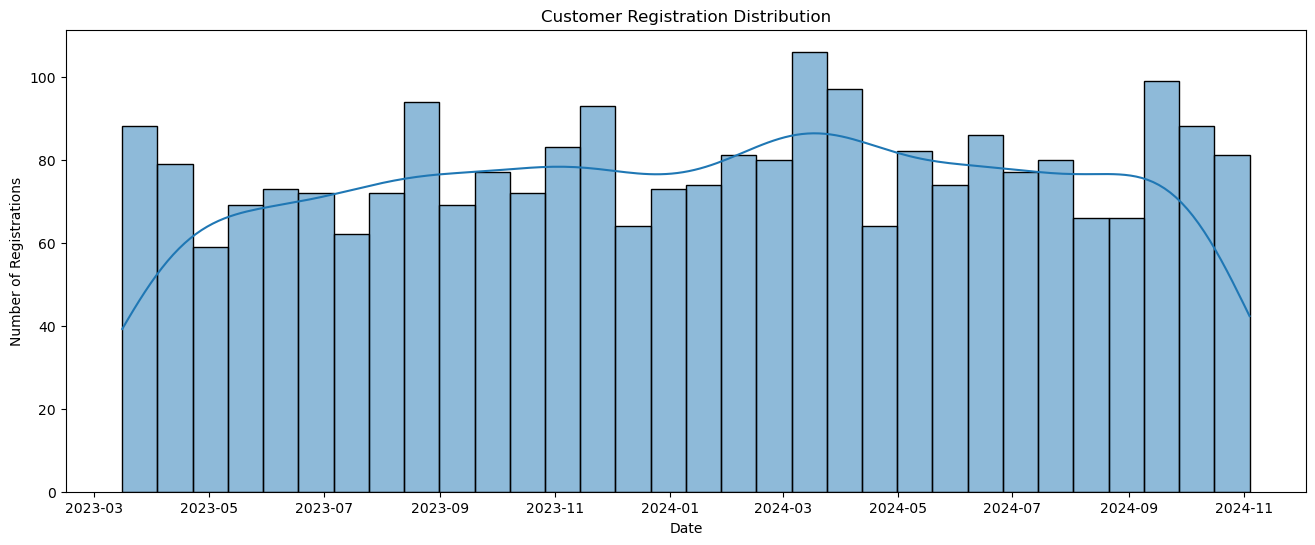

In [412]:
# visual for customer registration distribution over time
plt.figure(figsize=(16,6))
sns.histplot(cust_df['registration_date'], bins=32, kde=True)
plt.title('Customer Registration Distribution')
plt.xlabel('Date')
plt.ylabel('Number of Registrations')
plt.show()

This plot shows a the distribution of which months customers registered. It is even for the most part. More customers registered in early 2023, August of 2023, November of 2023, April of 2024. In the most recent months contained in the data which are Septermber-November of 2024, customer registration increases agiain, up from a small dip in registrations from the previous 2 months of August and September of 2024. This pattern could be the result of effective marketing or seasonal promotions and seasonal increased shopping activity as a whole.

## **File 7: Blinkit Customer Feedback**

This section analyzes customer-submitted reviews to extract insights about satisfaction, pain points, and overall sentiment toward the Blinkit experience. By examining patterns in sentiment and ratings, I can identify recurring issues, highlight strong-performing or under-performing areas, and provide recommendations for service improvements.


In [348]:
feedback_df = pd.read_csv('/Users/tovi/Desktop/Projects/Blinket-Sales/csv_files/blinkit_customer_feedback.csv')
feedback_df

,feedback_id,order_id,customer_id,rating,feedback_text,feedback_category,sentiment,feedback_date
0,2234710,1961864118,30065862,4,"It was okay, nothing special.",Delivery,Neutral,2024-07-17
1,5450964,1549769649,9573071,3,The order was incorrect.,App Experience,Negative,2024-05-28
2,482108,9185164487,45477575,3,"It was okay, nothing special.",App Experience,Neutral,2024-09-23
3,4823104,9644738826,88067569,4,The product met my expectations.,App Experience,Neutral,2023-11-24
4,3537464,5427684290,83298567,3,Product was damaged during delivery.,Delivery,Negative,2023-11-20
...,...,...,...,...,...,...,...,...
4995,9024060,1669690997,62600289,3,Taste was not as expected.,Product Quality,Negative,2023-12-25
4996,4715968,8340761903,53640286,3,"Average experience, could improve.",Product Quality,Neutral,2023-11-27
4997,9621021,5936301790,87059497,4,"Average experience, could improve.",App Experience,Neutral,2024-06-21
4998,1134095,5710579377,67310893,4,"Average experience, could improve.",Delivery,Neutral,2024-06-06


In [349]:
feedback_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   feedback_id        5000 non-null   int64 
 1   order_id           5000 non-null   int64 
 2   customer_id        5000 non-null   int64 
 3   rating             5000 non-null   int64 
 4   feedback_text      5000 non-null   object
 5   feedback_category  5000 non-null   object
 6   sentiment          5000 non-null   object
 7   feedback_date      5000 non-null   object
dtypes: int64(4), object(4)
memory usage: 312.6+ KB


In [350]:
rating_stats = feedback_df['rating'].describe()
print(rating_stats)

count    5000.00000
mean        3.34440
std         1.18982
min         1.00000
25%         3.00000
50%         4.00000
75%         4.00000
max         5.00000
Name: rating, dtype: float64


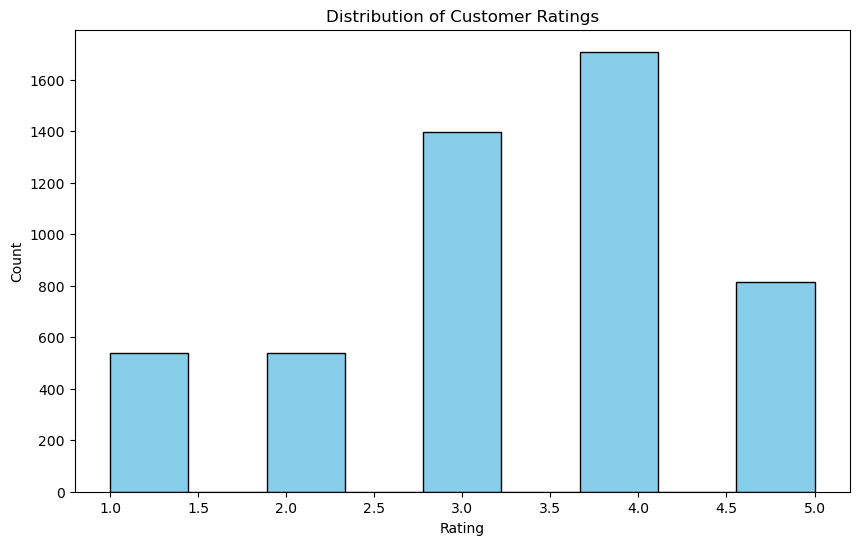

In [351]:
# visual for customer rating distribution
plt.figure(figsize=(10,6))
feedback_df['rating'].plot(kind='hist', bins=9, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Customer Ratings')
plt.show()

This histogram shows how customers rate their experiences, helping gauge overall satisfaction. The average overal rating is moderate at 3.34, with the majority of ratings fallign above or near the 3.0 value. This is adequate, but there is room for improvements to be made.

In [352]:
# counting occurrences of each sentiment
plt.figure(figsize=(6,6))
sentiment_counts = feedback_df['sentiment'].value_counts()
sentiment_counts

sentiment
Neutral     1738
Negative    1642
Positive    1620
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

In [353]:
# getting sentiment occurances as percentages
total_sentiments = sentiment_counts.sum()
sentiment_percentages = (sentiment_counts / total_sentiments) * 100
sentiment_percentages = sentiment_percentages.round(2)

print('Sentiment Percentages (%):')
print(sentiment_percentages)

Sentiment Percentages (%):
sentiment
Neutral     34.76
Negative    32.84
Positive    32.40
Name: count, dtype: float64


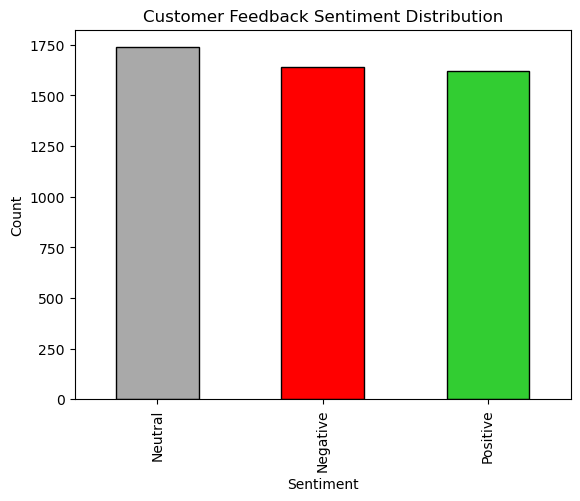

In [354]:
# visual for sentiment distribution
sentiment_counts.plot(kind='bar', color=['darkgray', 'red', 'limegreen'], edgecolor='black')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Customer Feedback Sentiment Distribution')
plt.show()

This plot shows the distribution of customer feedback by sentiment and helps asses where the majority of sentiments are in relation to other categories. Sentiment distribution is essentially flat, with neutral sentiments occuring more frequently than positive or negative responses. Converting these neutral sentiments to positive should be a priority. Conducting user surverys or interviews on what made the service neutral instead of positive or negative could be conducted to provide an explanantion for the amount of neutral feedback. 


In [355]:
# getting the average rating by feedback category
category_avg_rating = feedback_df.groupby('feedback_category')['rating'].mean().sort_values()
category_avg_rating

feedback_category
Product Quality     3.315200
Delivery            3.332809
App Experience      3.361913
Customer Service    3.368088
Name: rating, dtype: float64

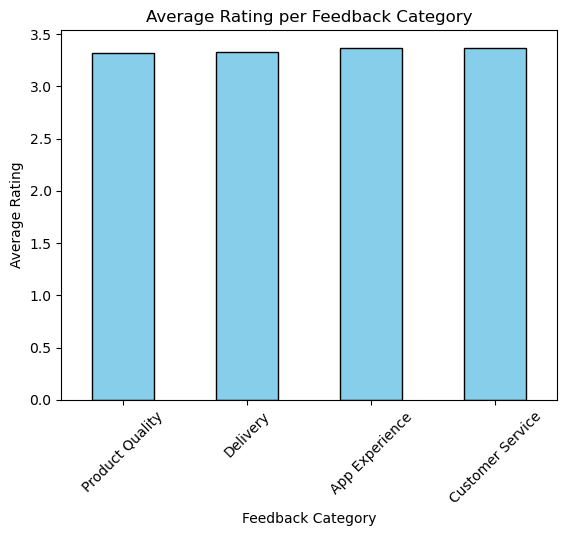

In [356]:
# visual for average rating by feedback category
category_avg_rating.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Feedback Category')
plt.ylabel('Average Rating')
plt.title('Average Rating per Feedback Category')
plt.xticks(rotation=45)
plt.show()

This plot shows which feedback topics tend to receive higher or lower average ratings. It is even across the board, suggesting no singular feedback category is doing better or worse than another.

In [251]:
# tracking sentiments over time
feedback_df['feedback_date'] = pd.to_datetime(feedback_df['feedback_date'])
sentiment_trend = feedback_df.groupby(feedback_df['feedback_date'].dt.to_period('M'))['sentiment'].value_counts().unstack()
sentiment_trend

sentiment,Negative,Neutral,Positive
feedback_date,,,
2023-03,34,47,39
2023-04,86,72,79
2023-05,101,92,84
2023-06,73,83,76
2023-07,71,91,82
2023-08,95,101,89
2023-09,97,77,88
2023-10,82,93,79
2023-11,76,108,81


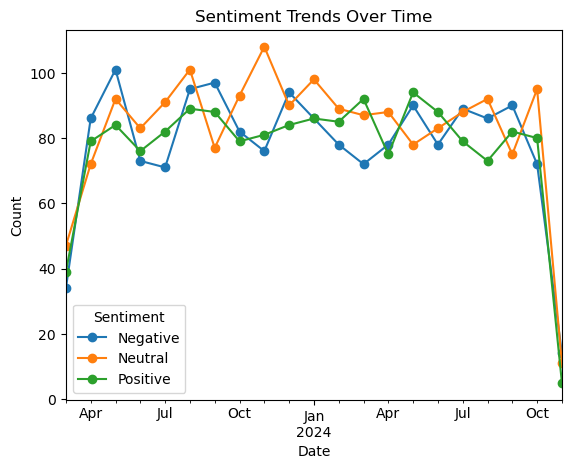

In [252]:
# visual for sentiments over time
sentiment_trend.plot(kind='line', marker='o')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Sentiment Trends Over Time')
plt.legend(title='Sentiment')

# save to images folder
plt.savefig('images/sentiment_trends.png')
plt.show()

A time-series breakdown of feedback sentiment reveals how customer satisfaction trends over time. All 3 sentiments follow  a similar trend, suggesting that the overall customer experience is steady. Consistency in delivery, product quality, or app experience is also likely. This also means that marketing and promotions seem to have little impact as they are now and could use some tailoring so that they are more customer-focused to influence satisfaction.

In [253]:
from collections import Counter
import re

# combine all negative feedback
negative_feedback = ' '.join(feedback_df[feedback_df['sentiment'] == 'Negative']['feedback_text'])

# tokenize and count words
words = re.findall(r'\b\w+\b', negative_feedback.lower())
word_counts = Counter(words)

# getting 10 most common words
common_words = word_counts.most_common(20)
print(common_words)

[('was', 1158), ('the', 651), ('i', 526), ('not', 479), ('delivery', 360), ('order', 324), ('late', 182), ('and', 182), ('unhappy', 182), ('product', 178), ('damaged', 178), ('during', 178), ('worth', 175), ('price', 175), ('paid', 175), ('had', 169), ('a', 169), ('bad', 169), ('experience', 169), ('incorrect', 166)]


This helps categorize and identify recurring issues by showing the most common keywords in negative reviews. Based on these words it is apparant that negative reviews stem from:
- delivery times or issues
- item quality
- percieved value for items
- unsatisfactory experience with the platform or customer support
Consider revisiting pricing strategy or improving product imagery and descriptions to align expectations. Invesitgate customer support wait times and order issue resolution speeds.